In [13]:
import json

result_file = "output/20250118-18:00-all-results.json"
with open(result_file,'r') as f:
    results = json.load(f)

results

{'maxStreak=1': {'teams=4': {'maxStreakViolations': {'8': 229,
    '10': 297,
    '6': 96,
    '12': 247,
    '14': 87,
    '18': 1,
    '16': 17,
    '4': 23,
    '2': 3},
   'noRepeatViolations': {'4': 340,
    '2': 300,
    '6': 192,
    '0': 129,
    '8': 36,
    '10': 3},
   'doubleRoundRobinViolations': {'4': 101,
    '10': 197,
    '12': 114,
    '6': 220,
    '8': 337,
    '16': 5,
    '2': 14,
    '14': 11,
    '0': 1}},
  'teams=6': {'maxStreakViolations': {'32': 94,
    '24': 162,
    '28': 179,
    '22': 67,
    '30': 149,
    '26': 211,
    '34': 50,
    '20': 39,
    '14': 1,
    '36': 18,
    '38': 1,
    '18': 23,
    '16': 6},
   'noRepeatViolations': {'2': 71,
    '5': 157,
    '7': 119,
    '0': 2,
    '6': 158,
    '9': 34,
    '10': 29,
    '3': 154,
    '8': 76,
    '1': 22,
    '4': 155,
    '13': 6,
    '11': 9,
    '14': 4,
    '12': 4},
   'doubleRoundRobinViolations': {'20': 200,
    '18': 173,
    '22': 202,
    '14': 32,
    '24': 165,
    '30': 10,
    '16

/var/folders/jl/gzyytcwx575bwt8qjxjwzrbr0000gn/T/ipykernel_68232/2753527848.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, constrained_layout=True)


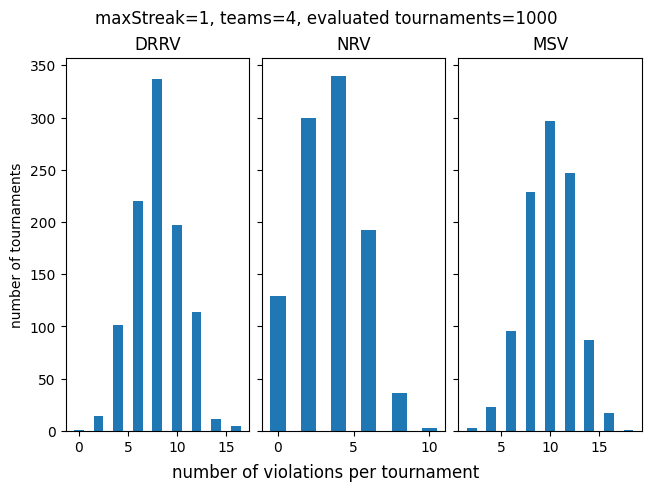

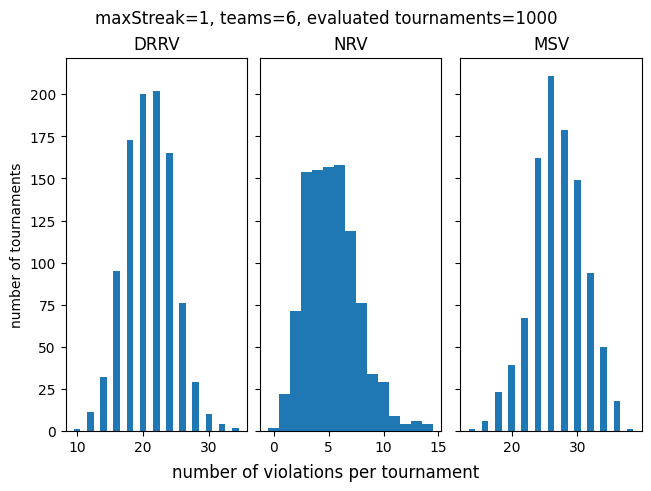

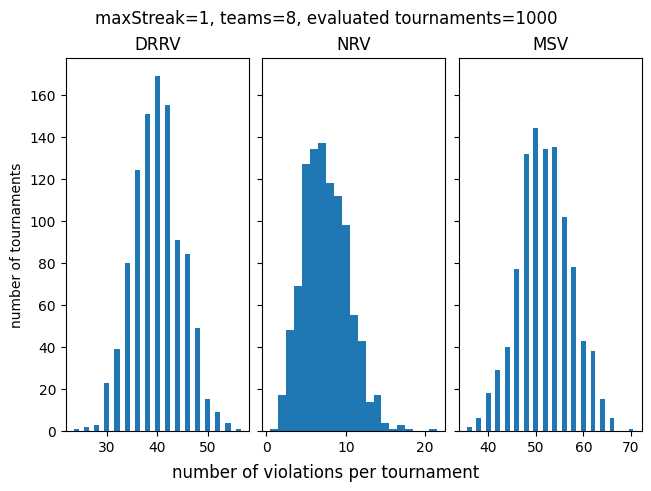

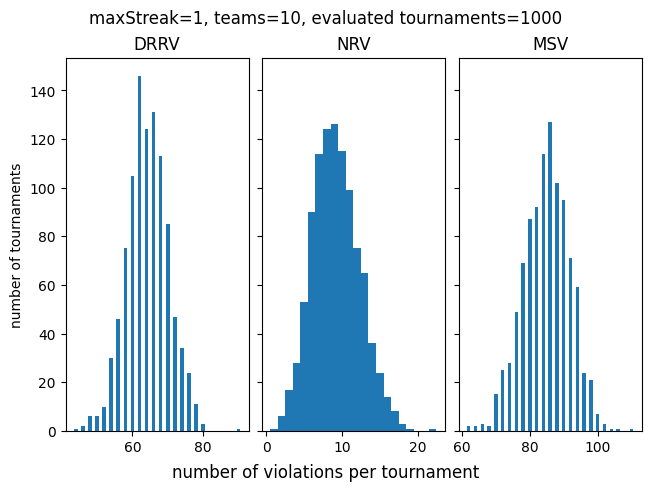

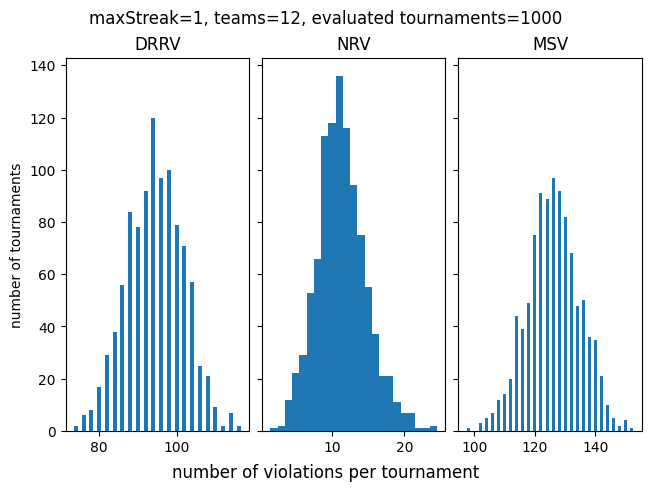

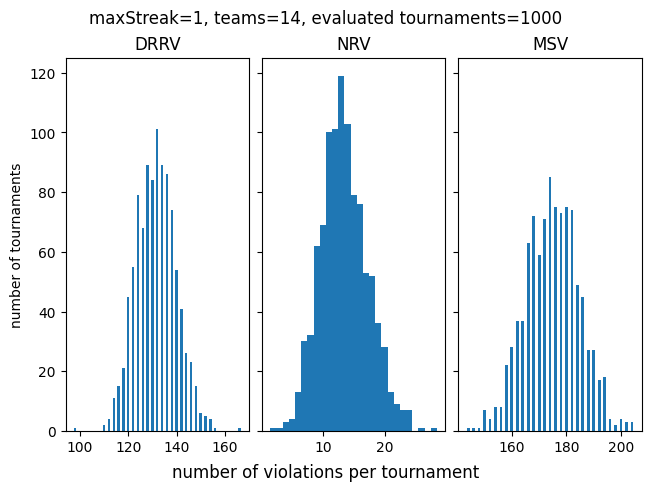

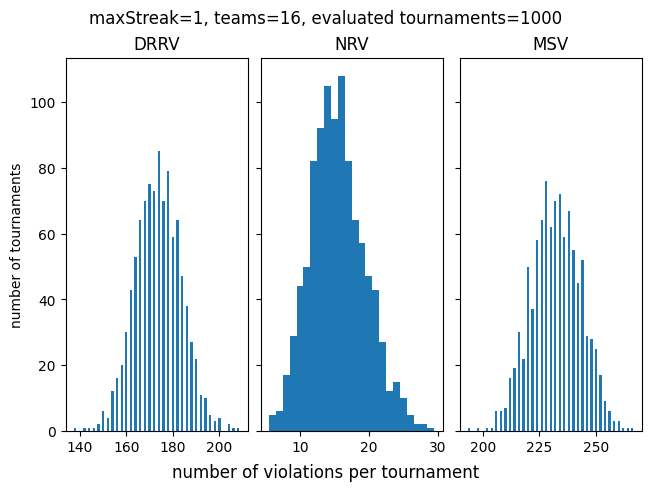

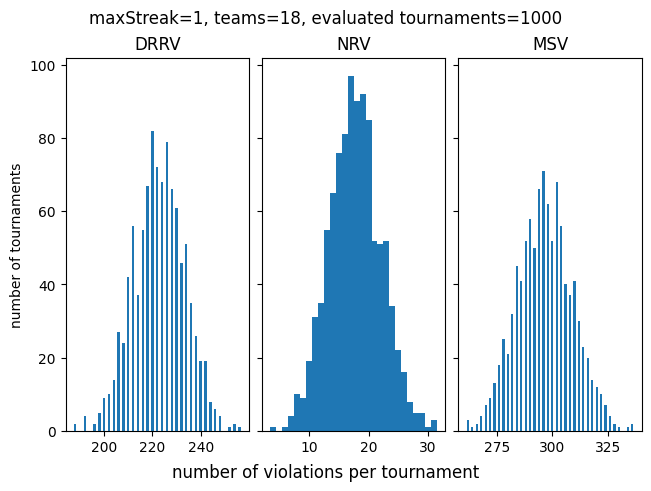

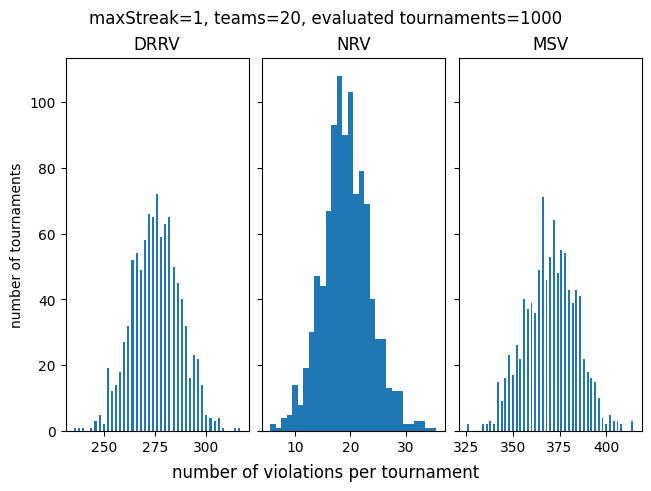

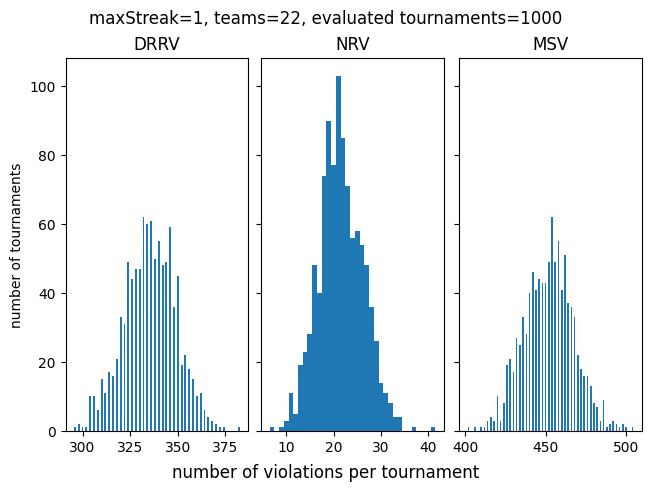

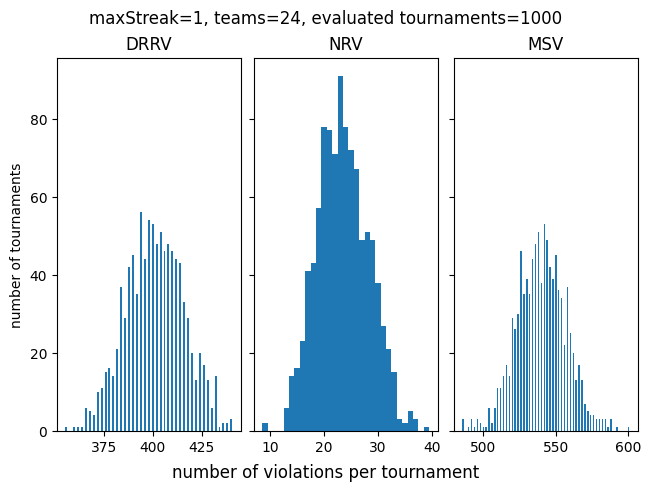

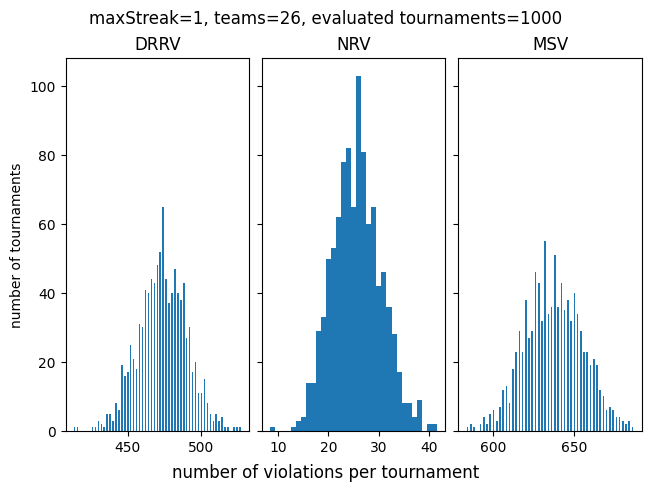

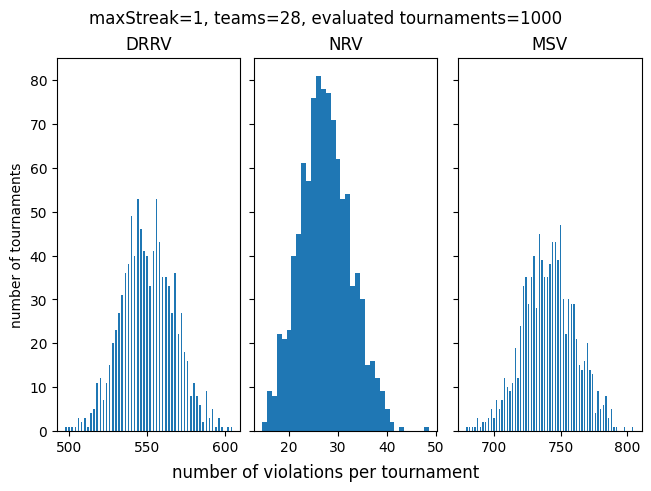

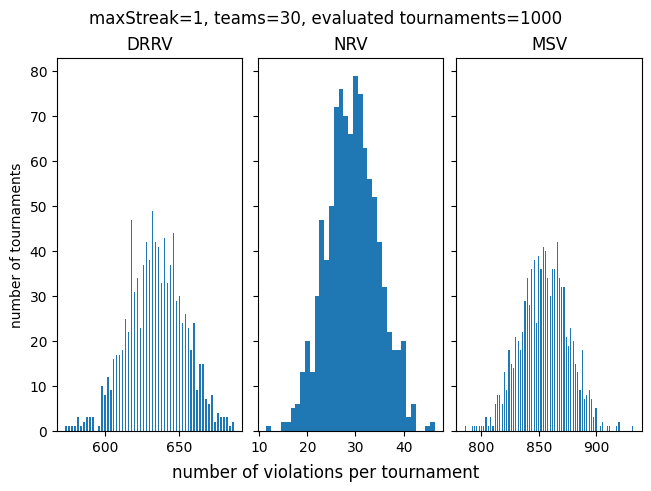

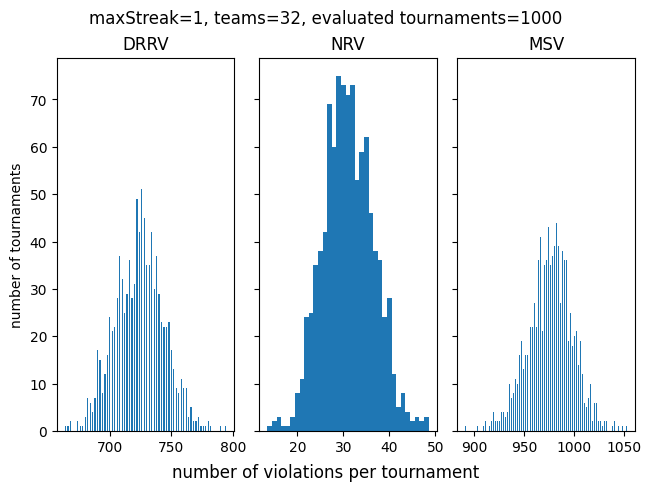

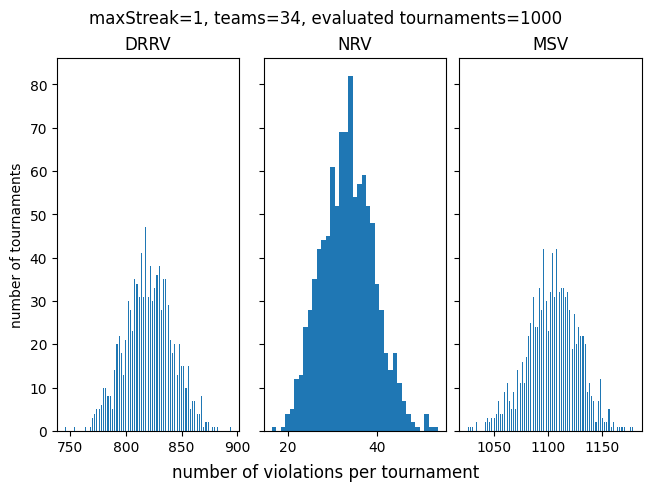

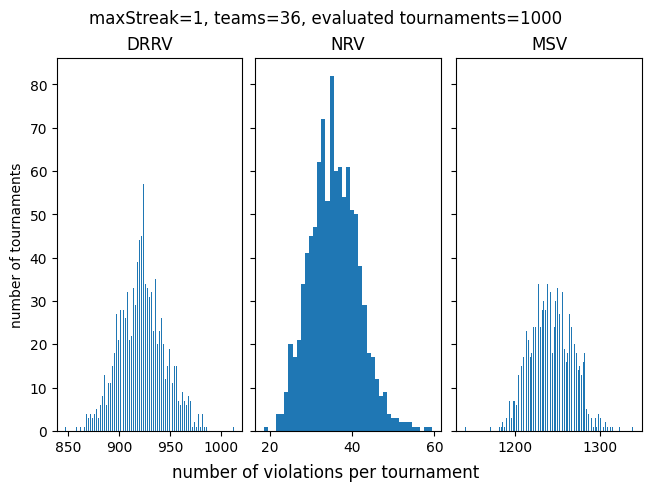

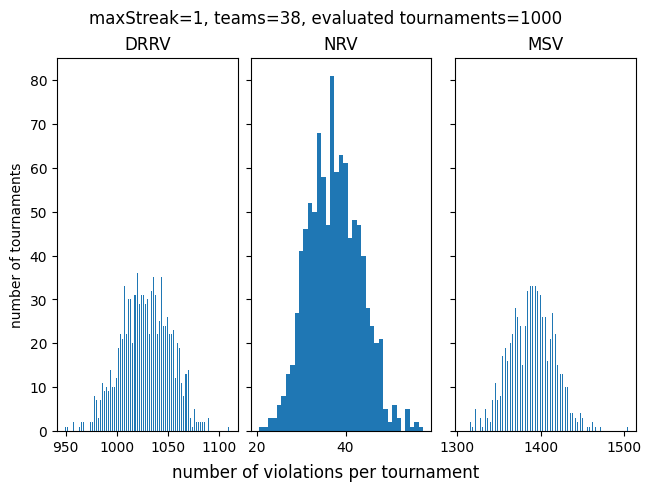

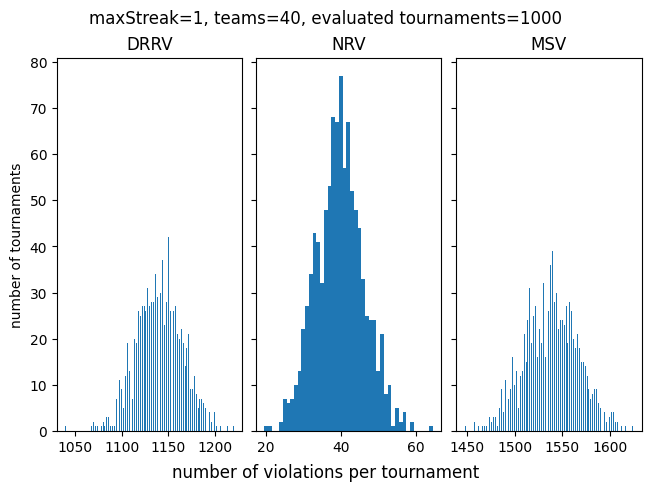

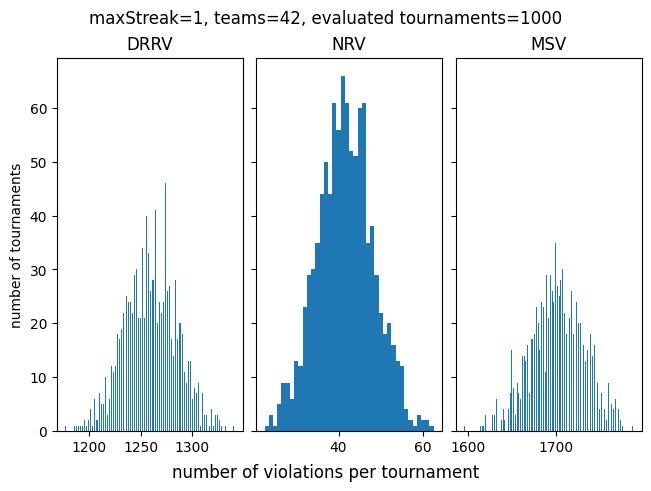

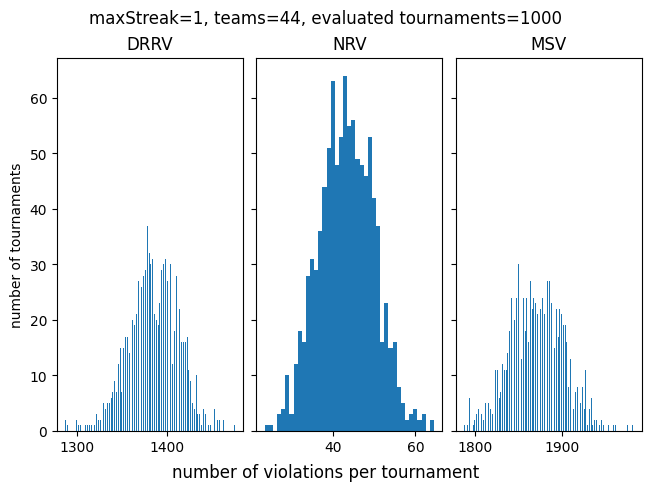

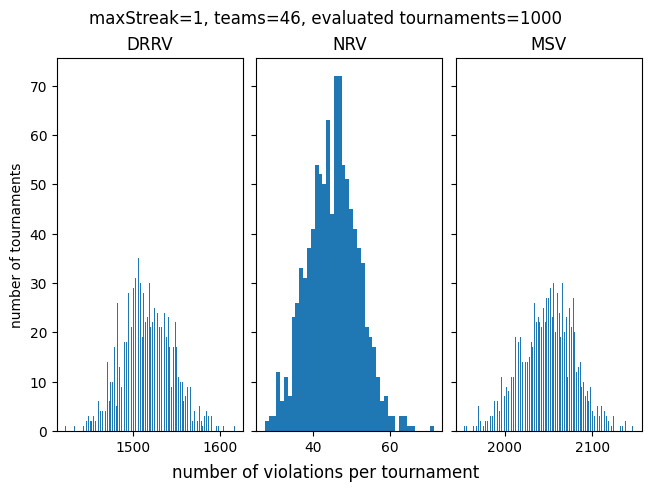

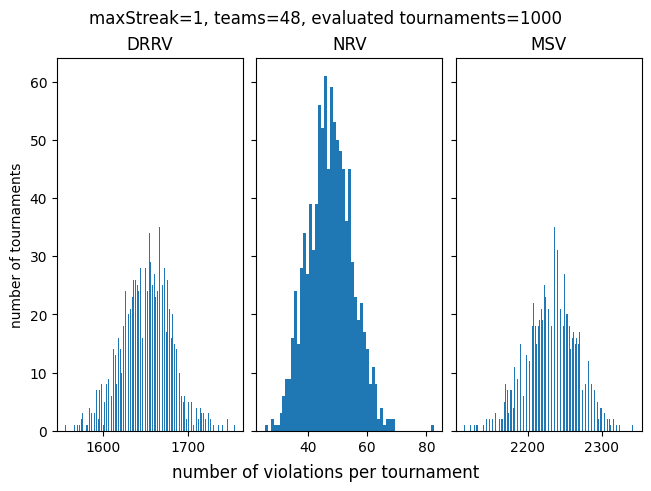

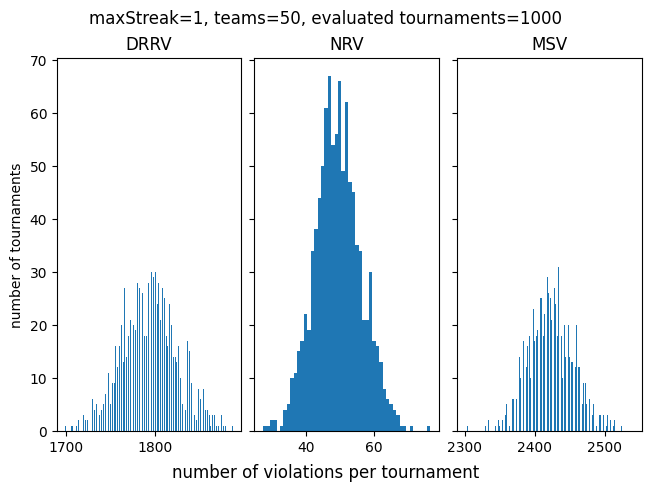

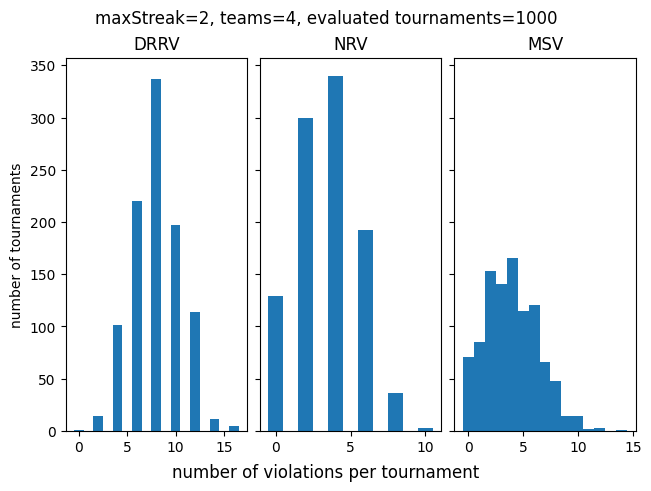

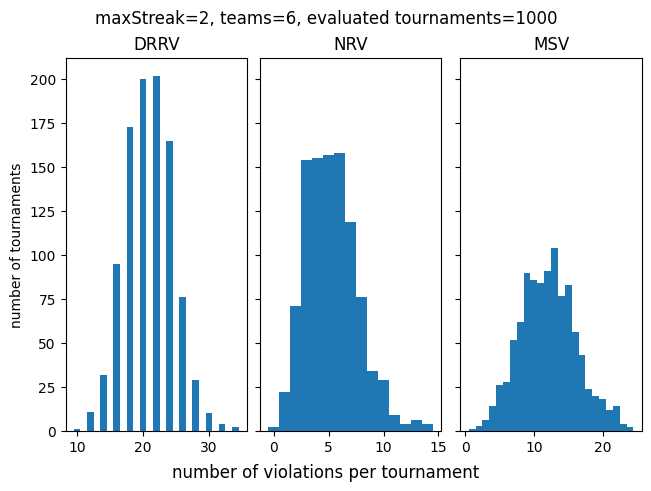

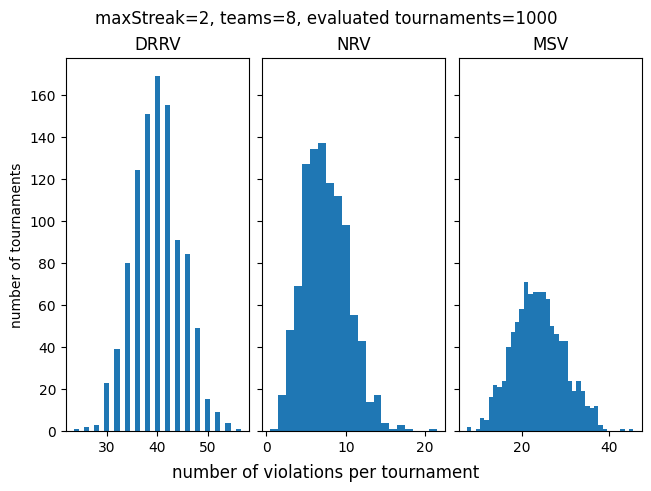

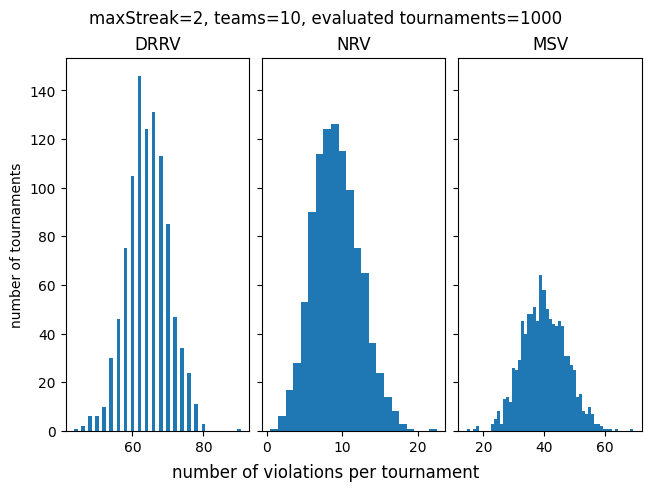

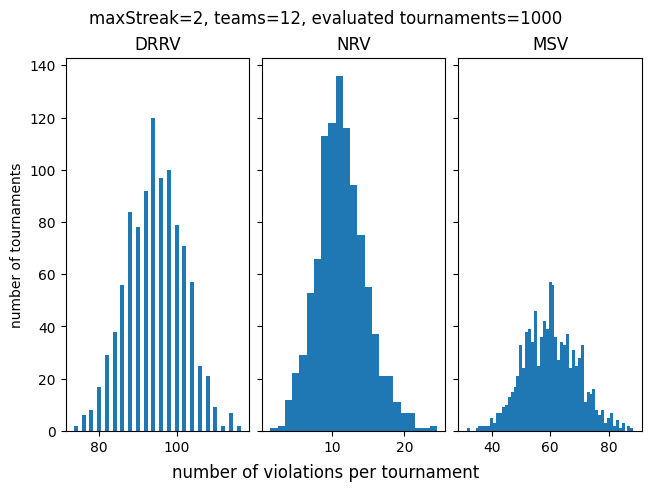

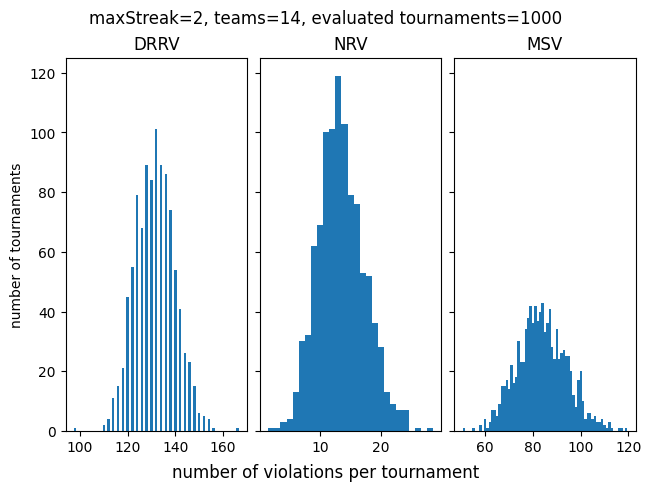

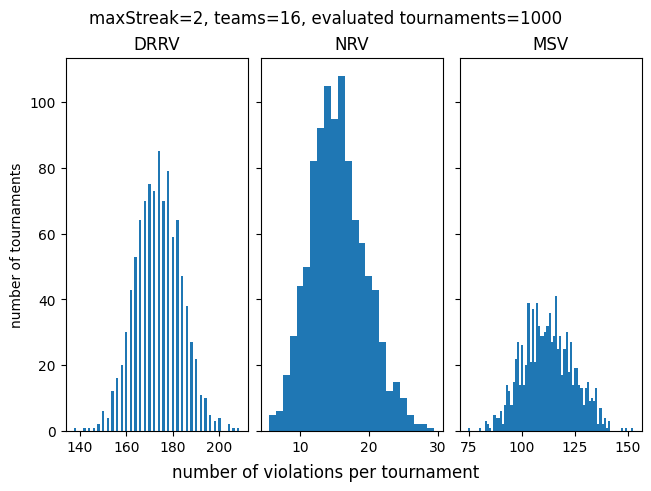

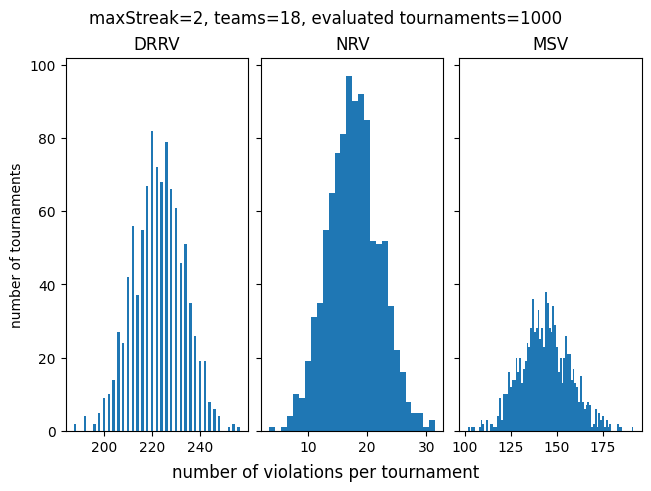

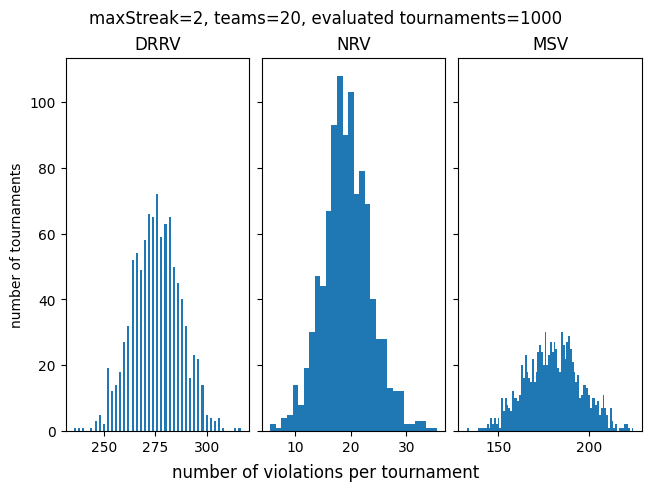

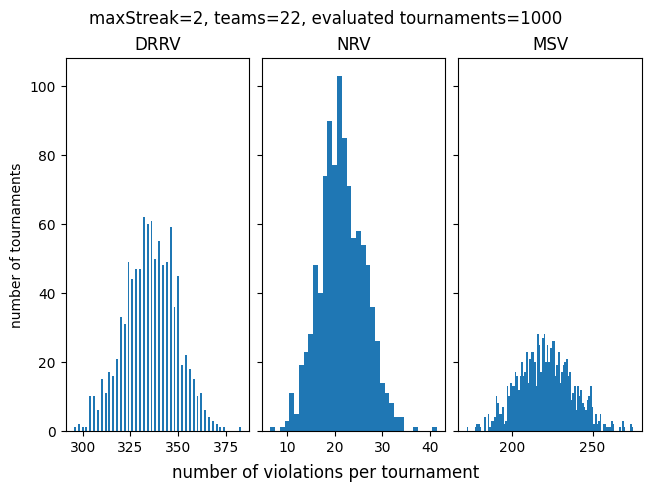

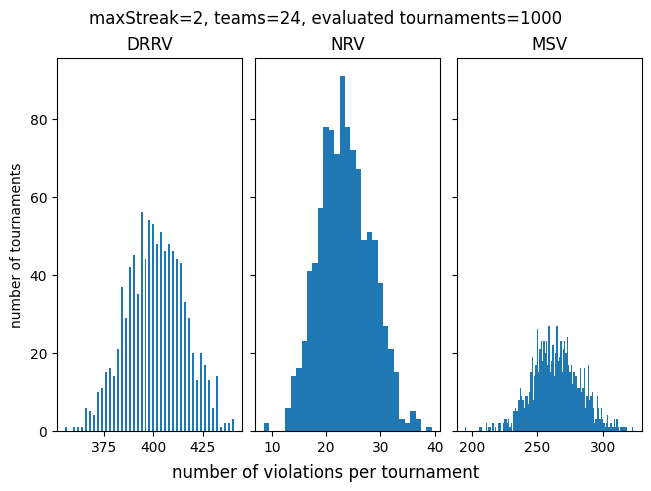

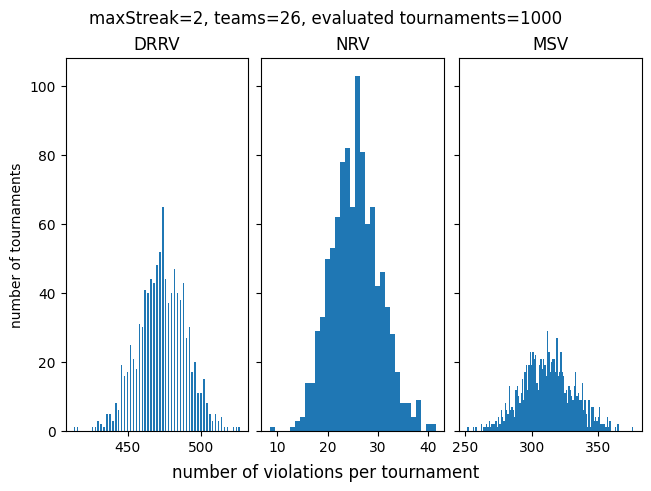

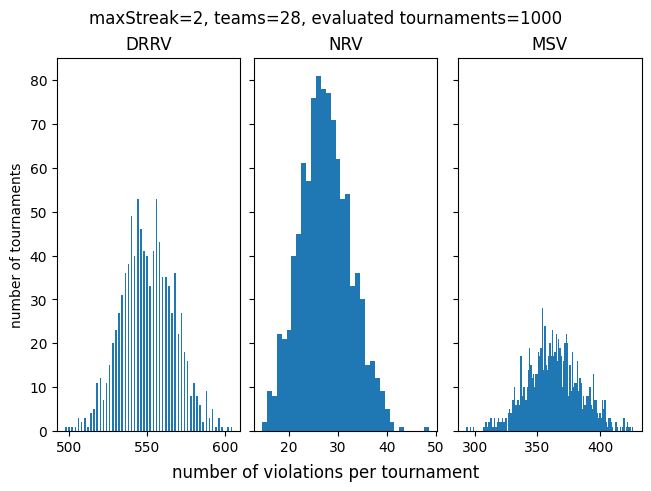

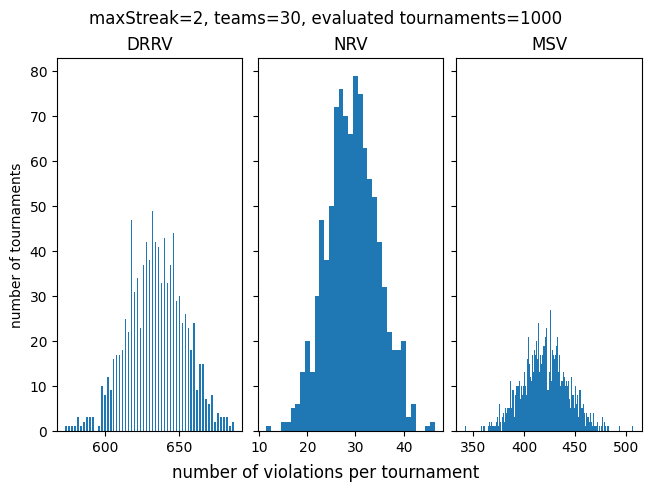

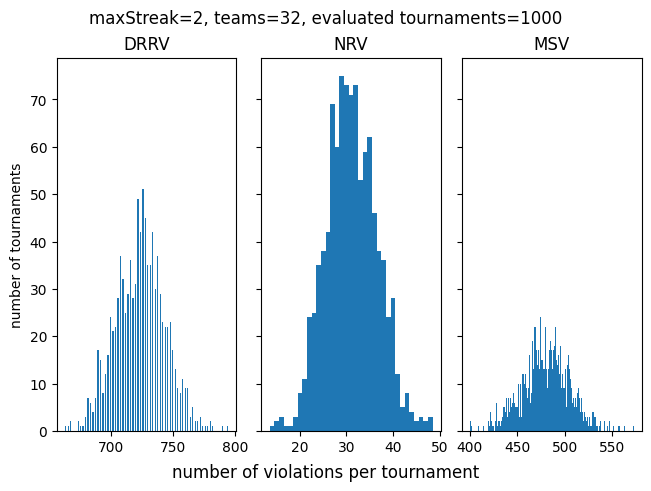

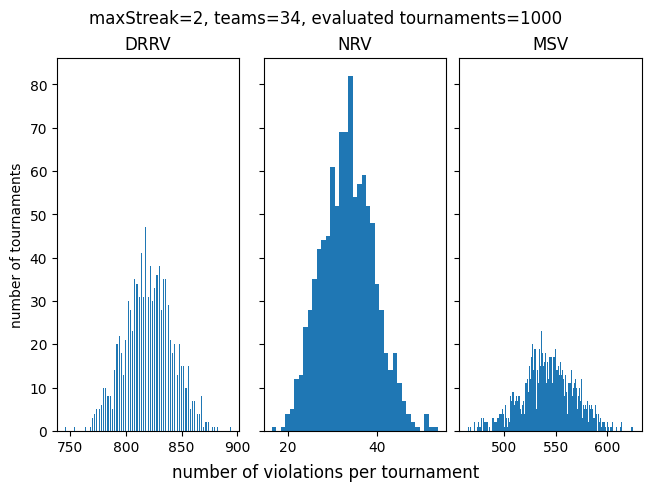

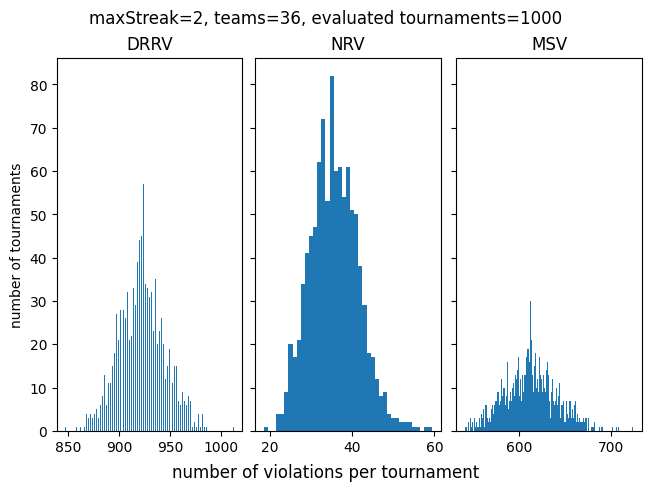

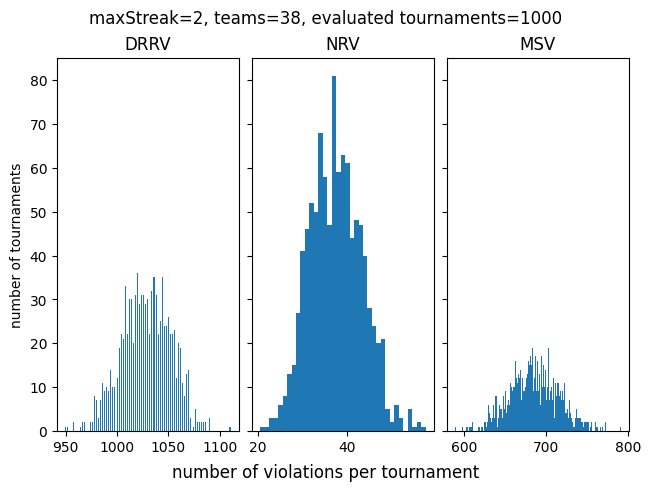

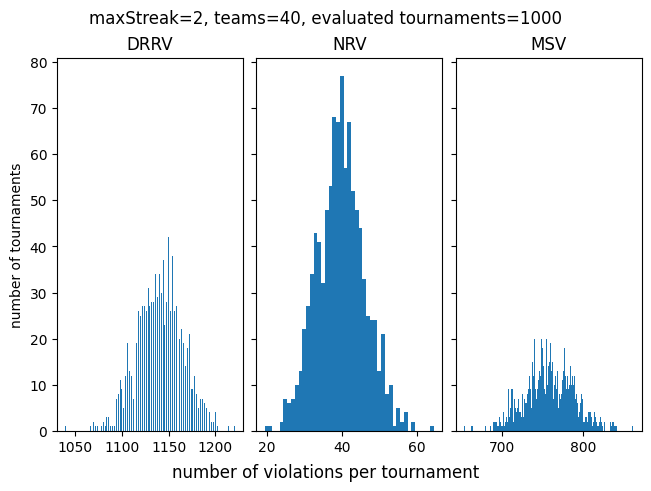

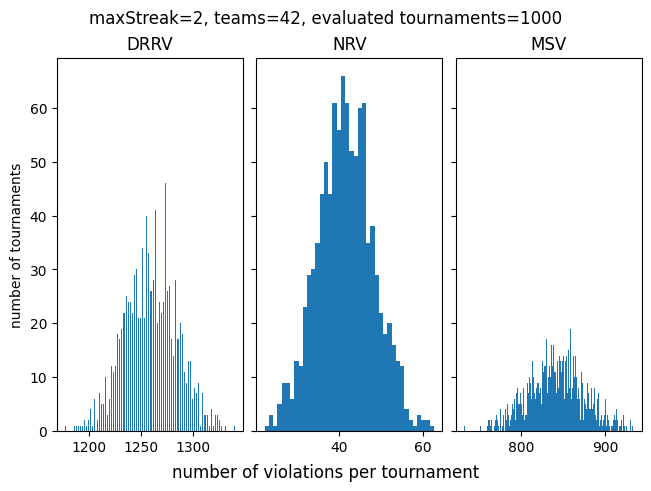

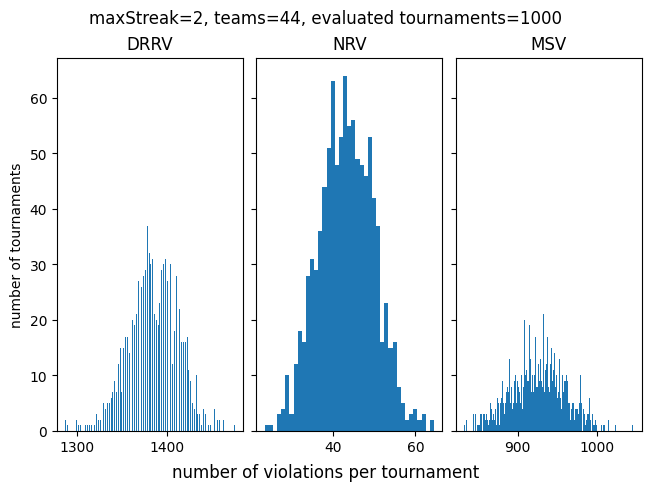

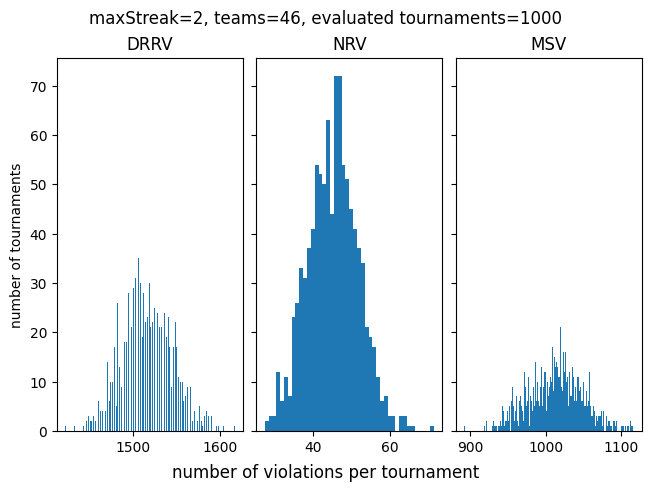

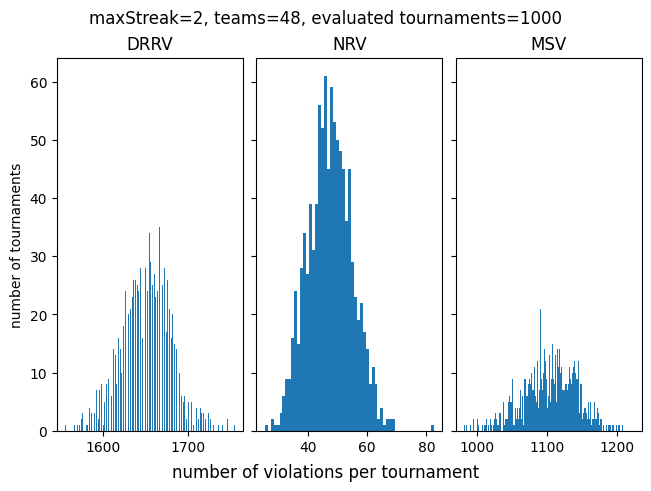

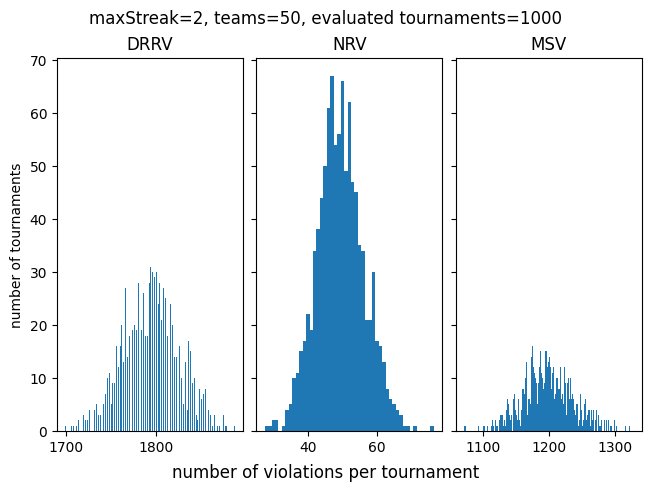

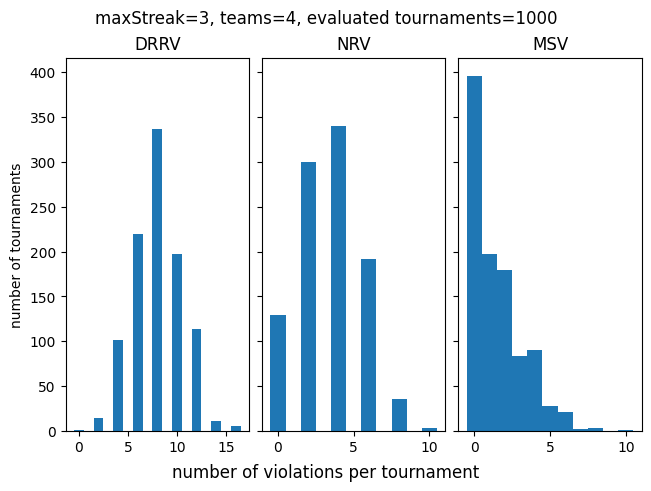

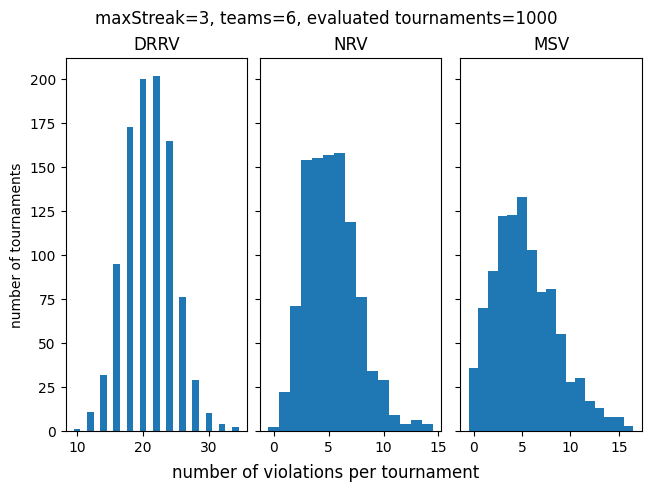

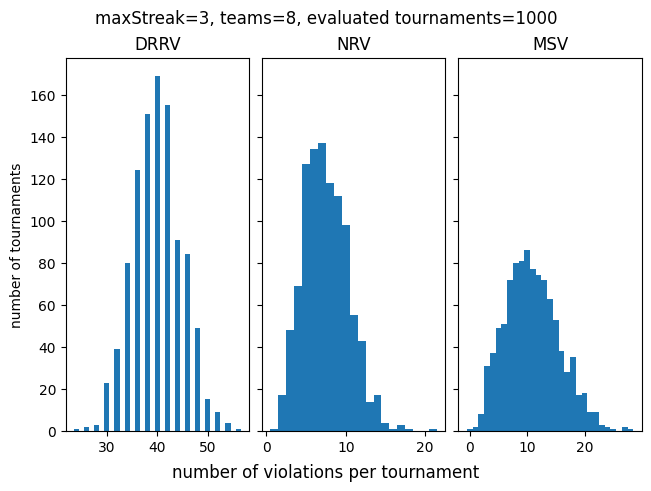

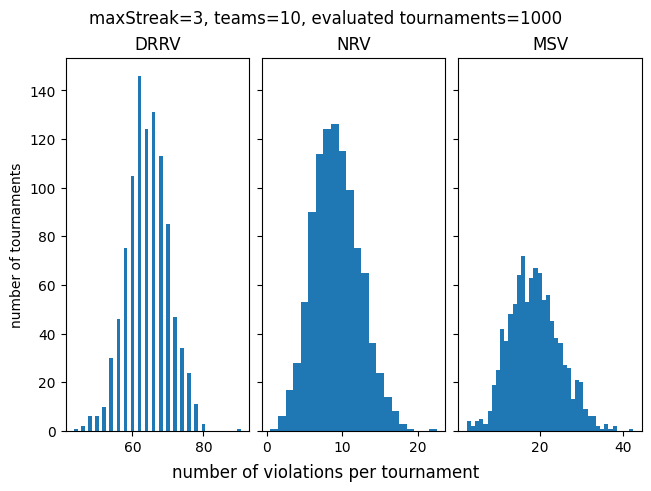

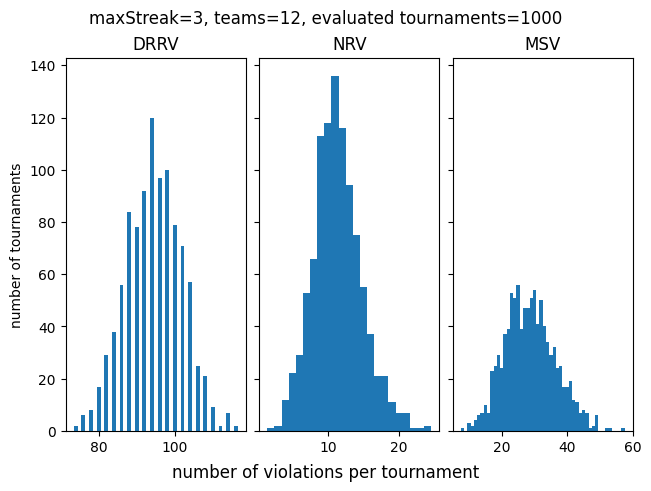

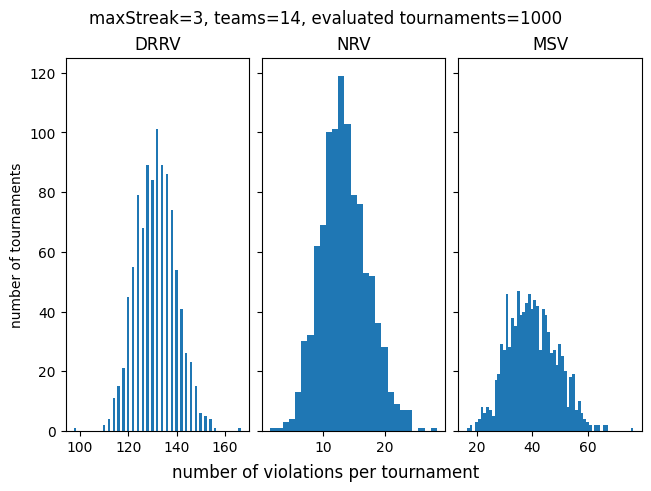

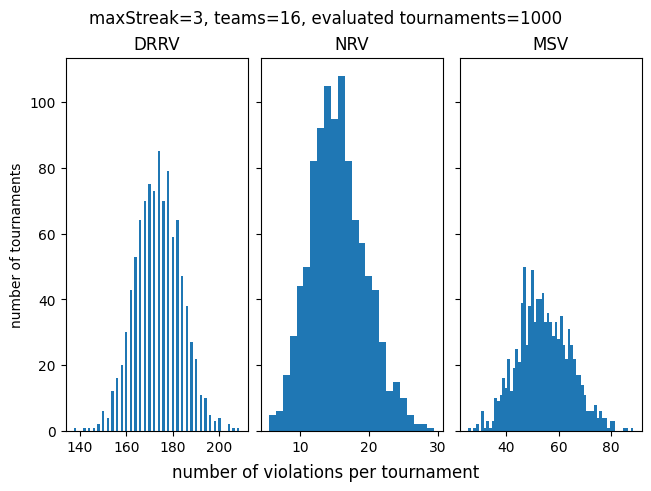

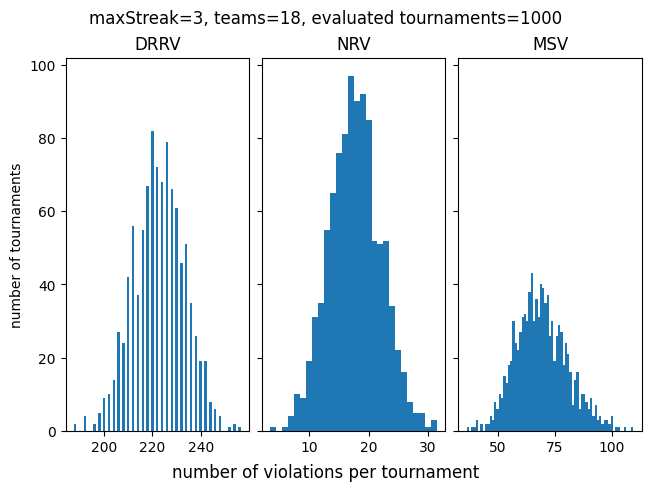

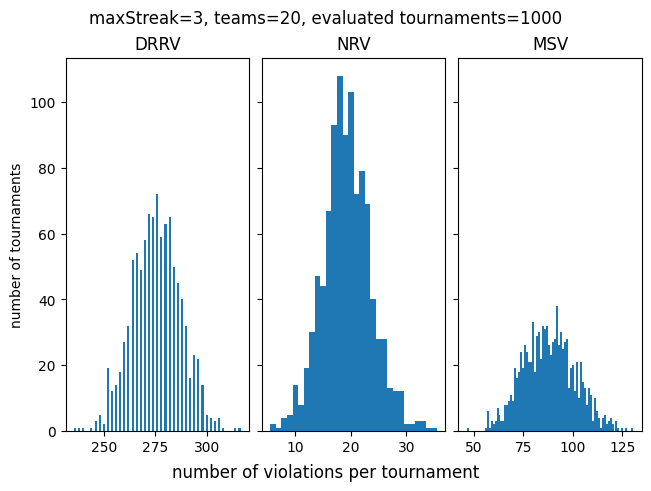

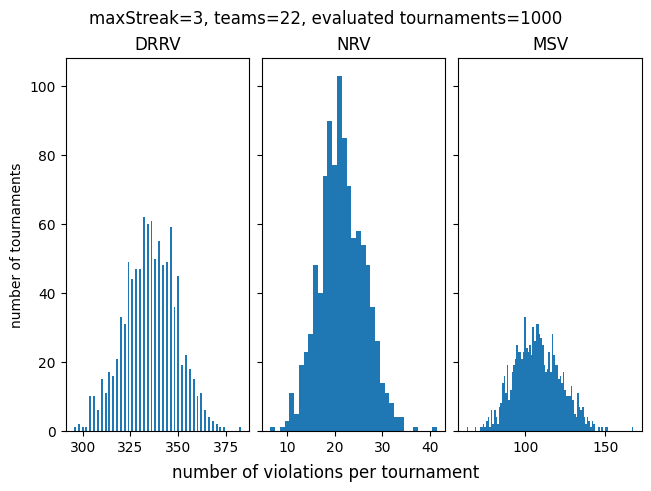

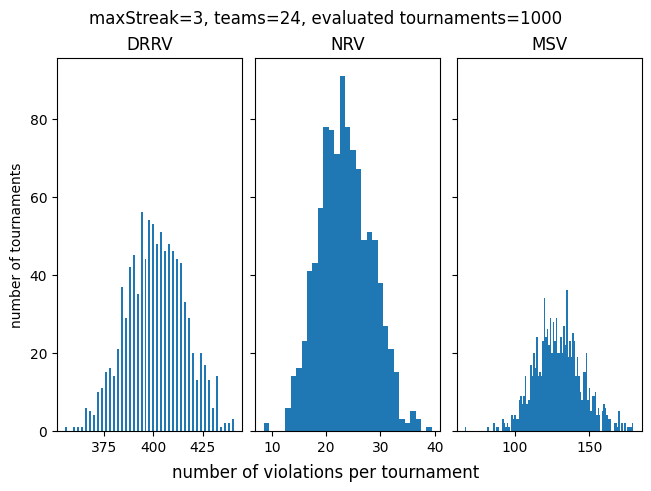

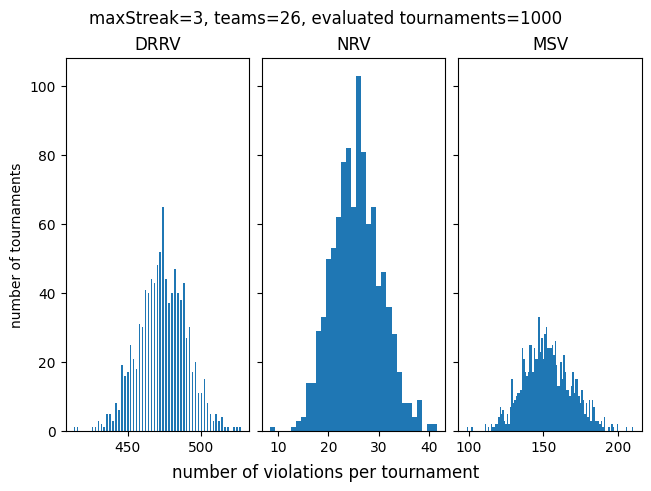

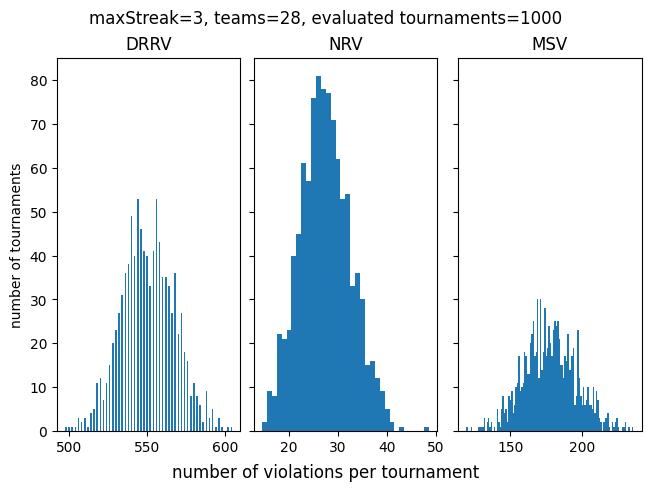

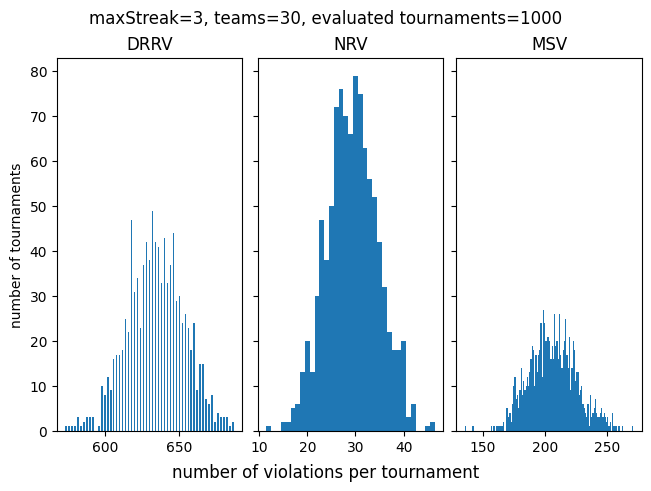

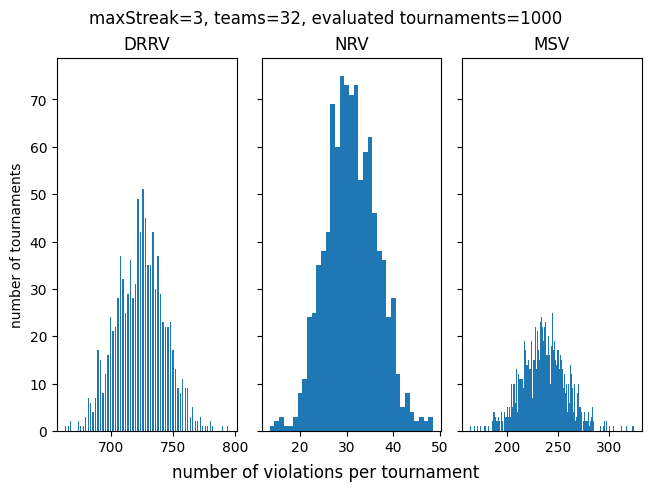

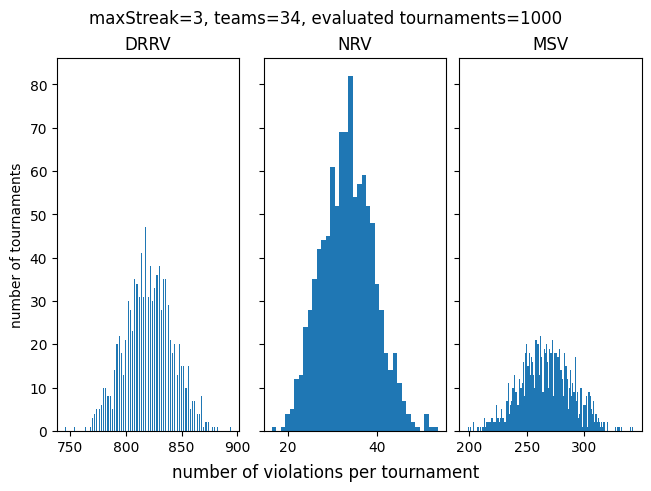

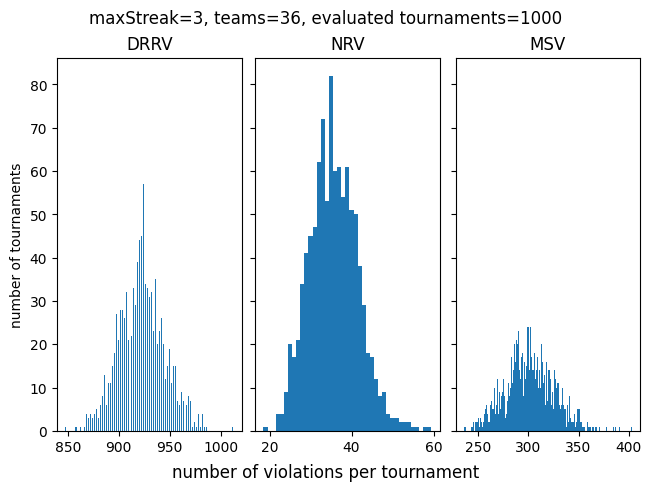

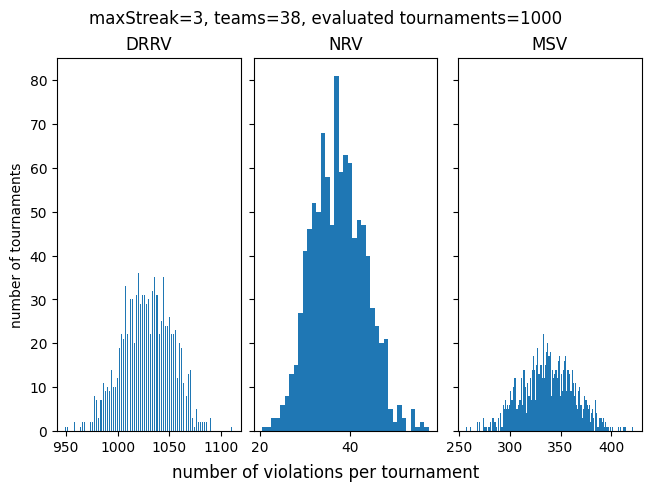

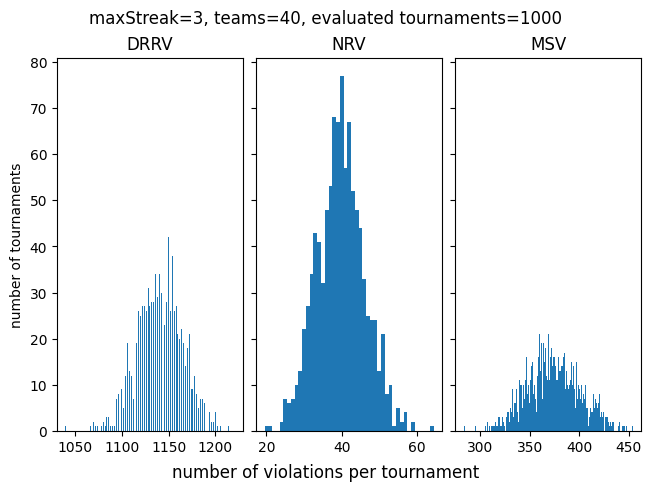

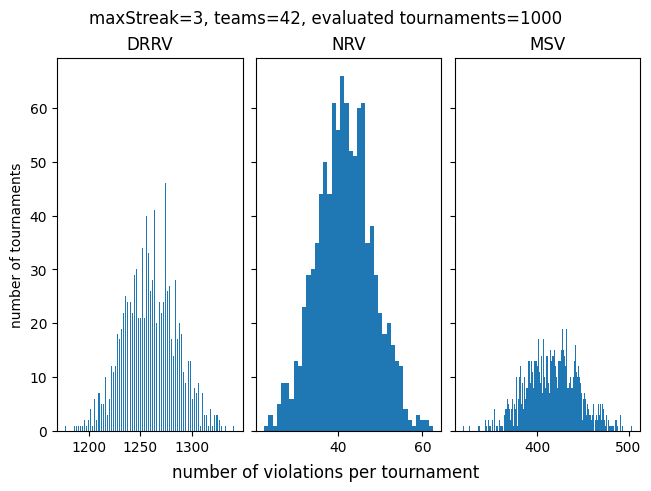

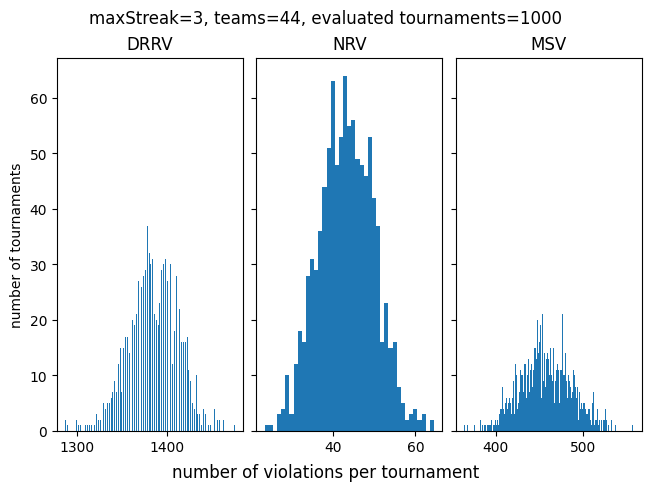

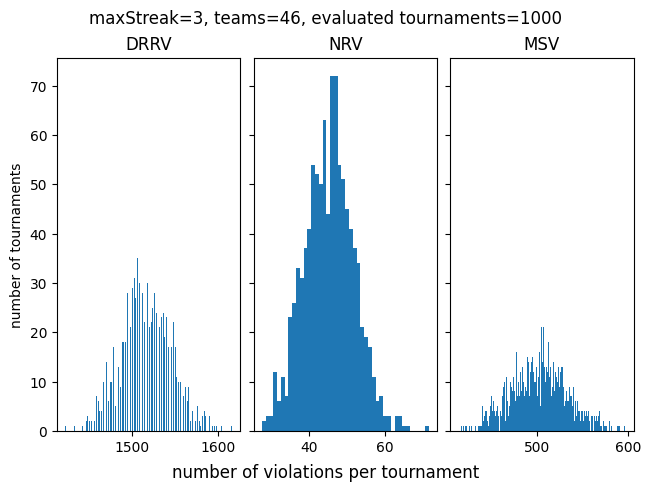

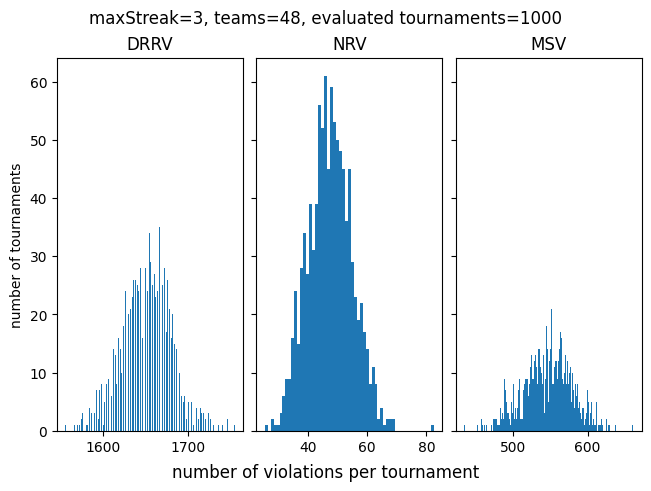

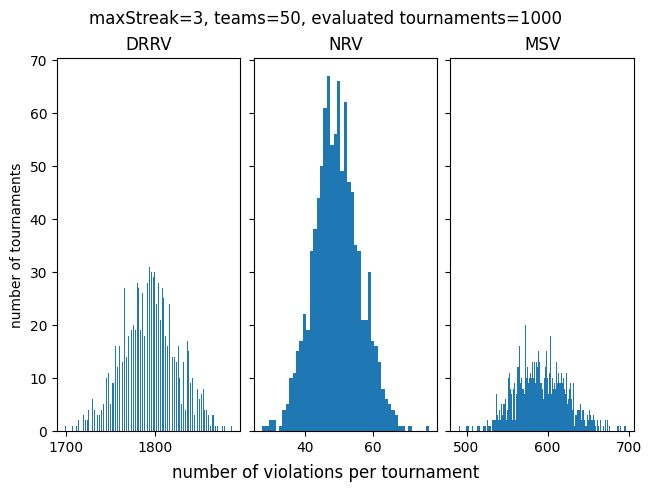

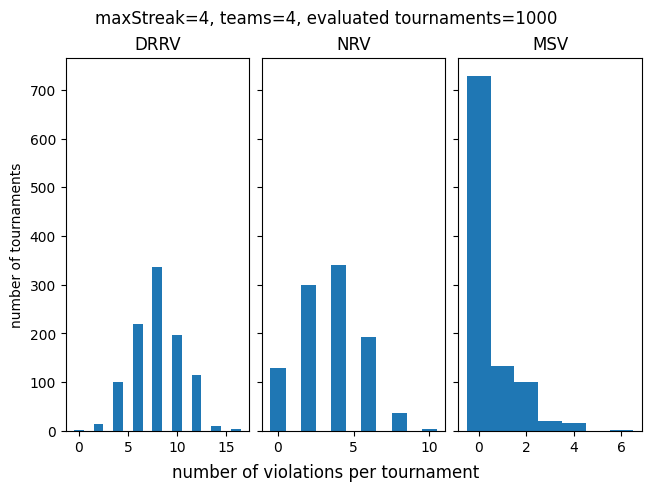

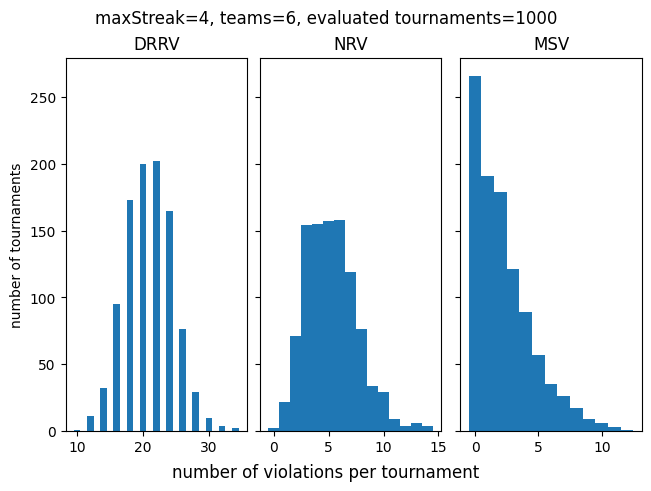

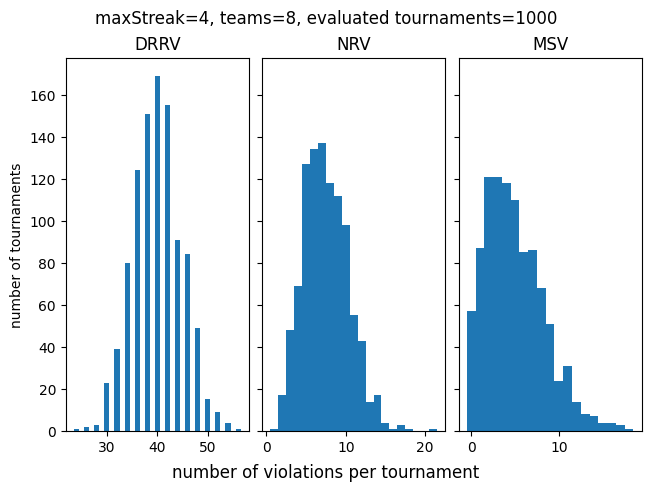

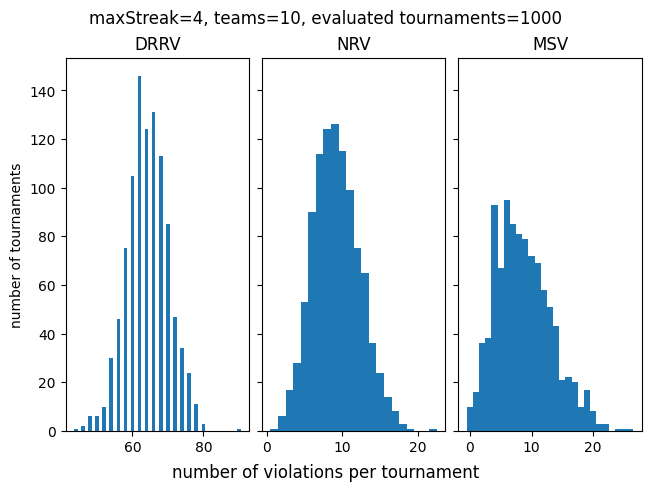

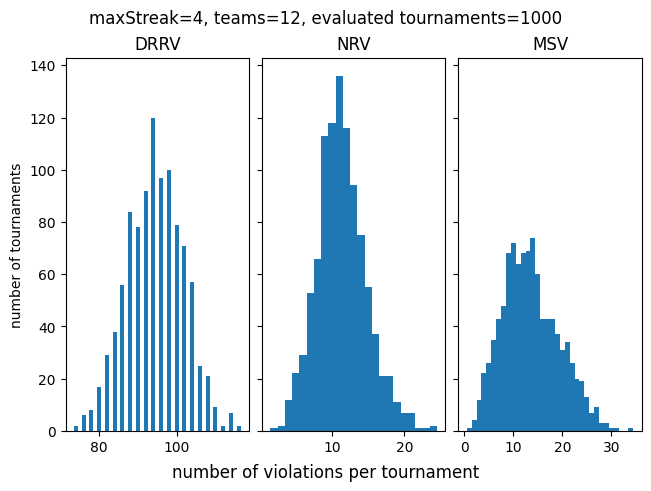

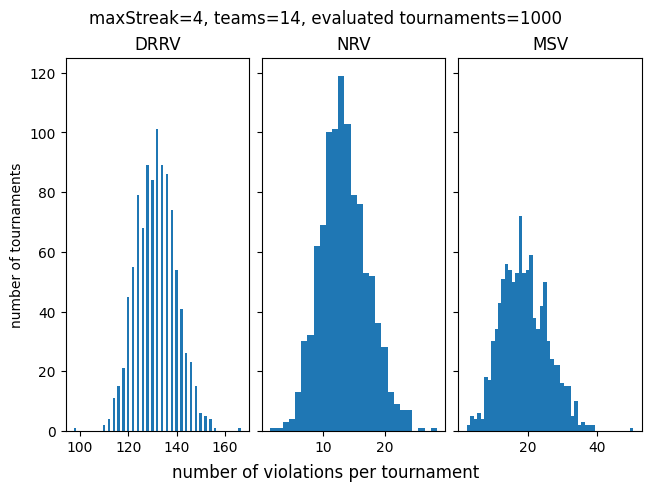

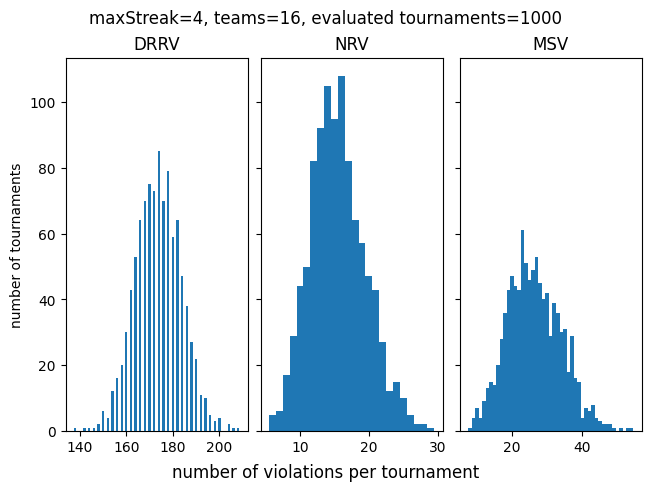

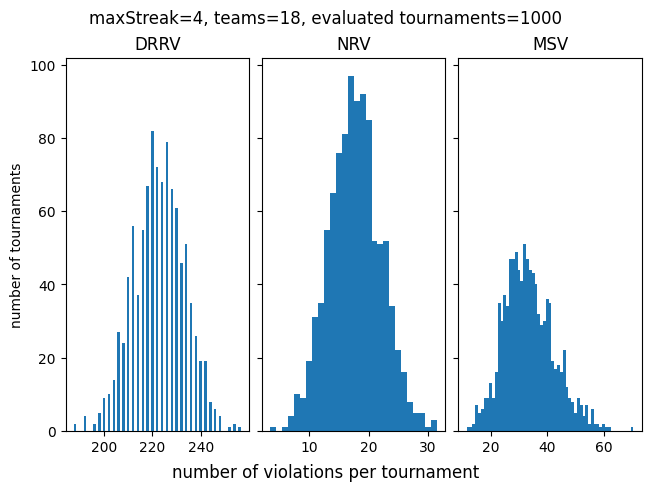

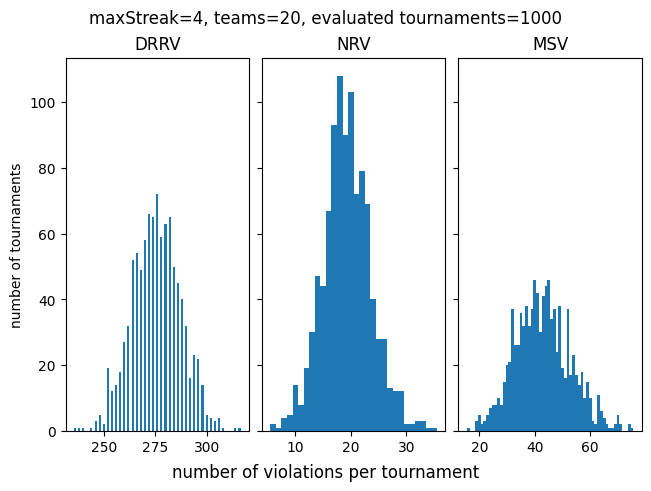

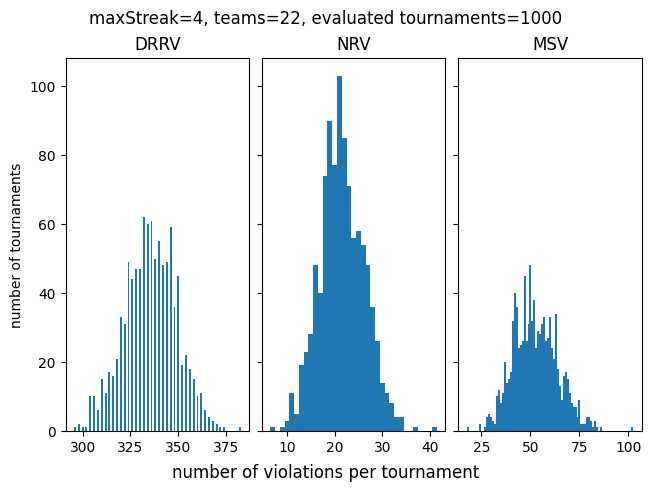

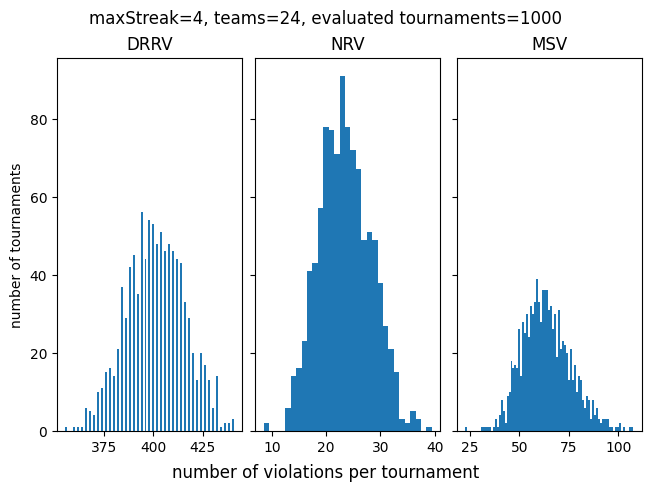

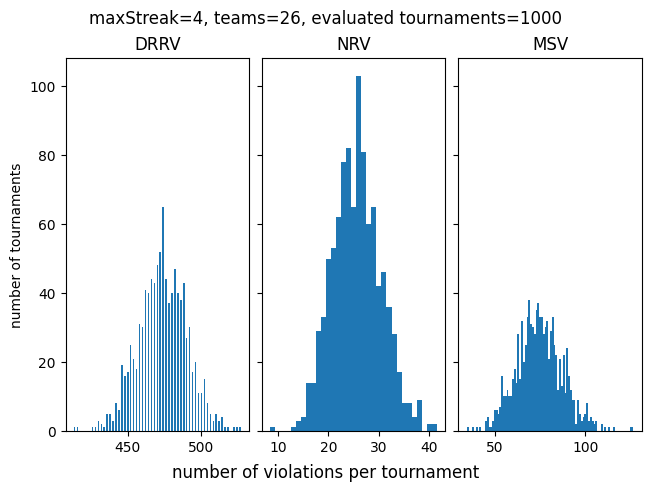

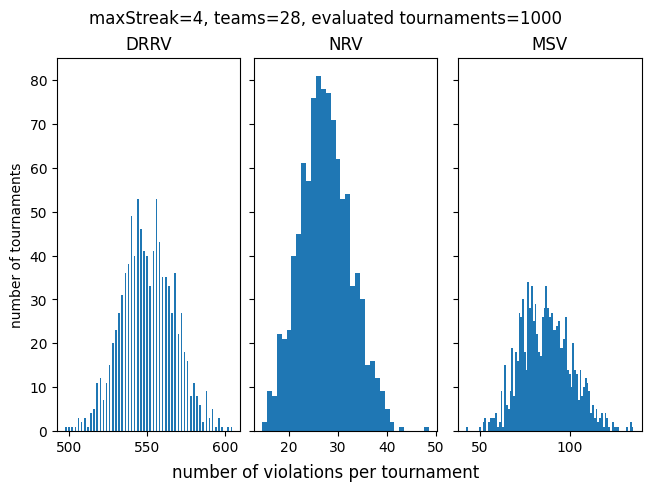

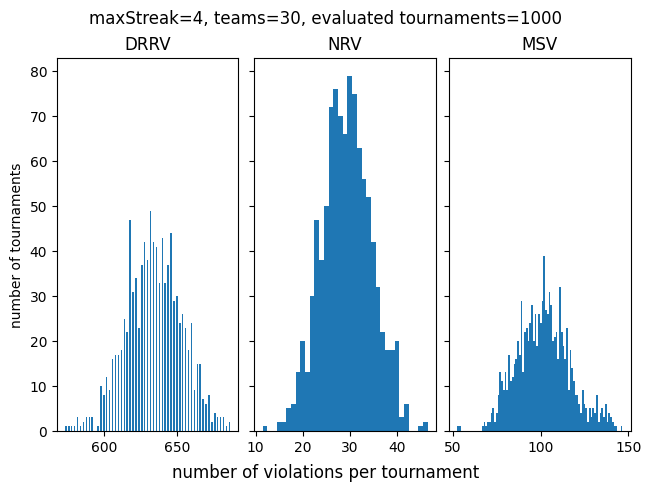

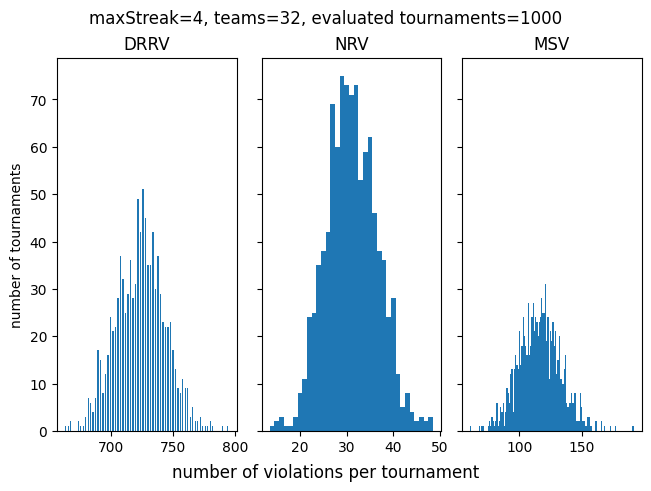

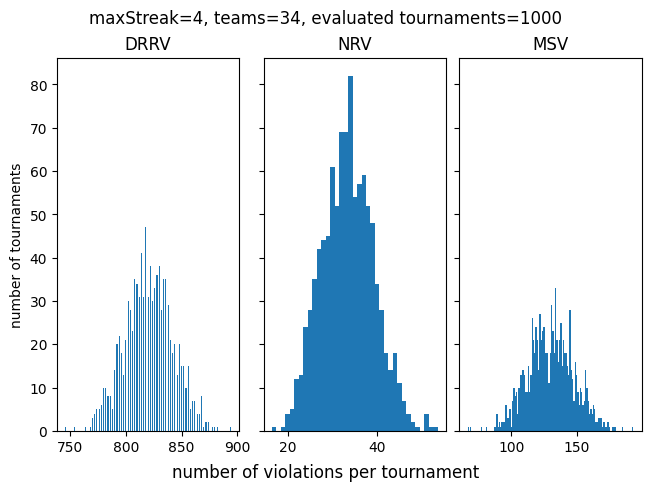

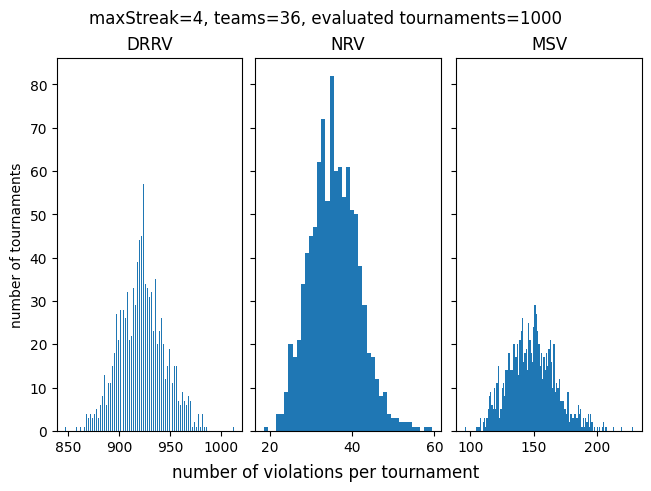

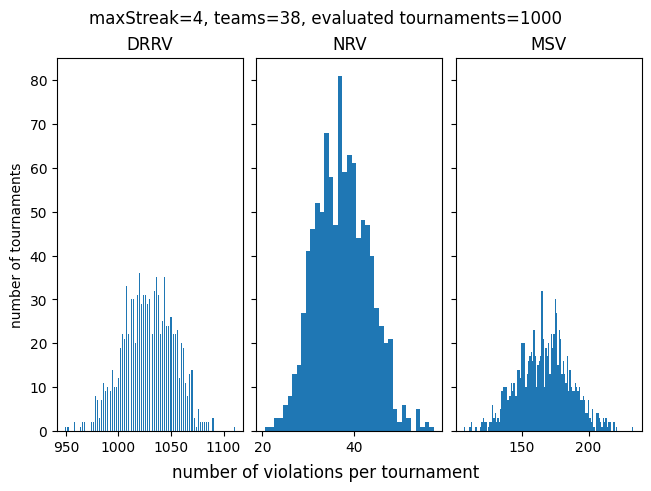

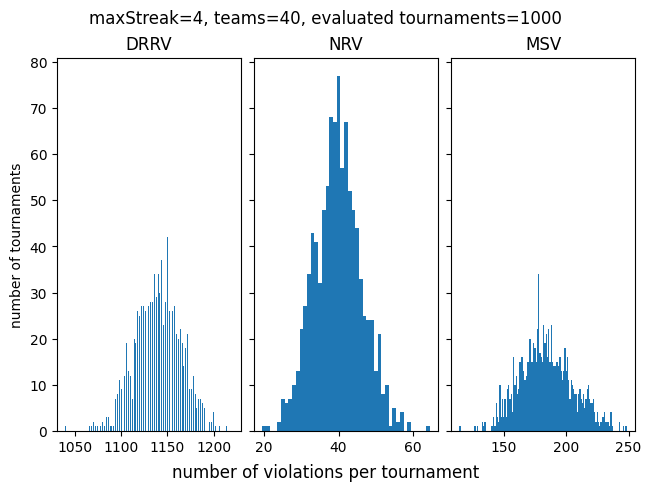

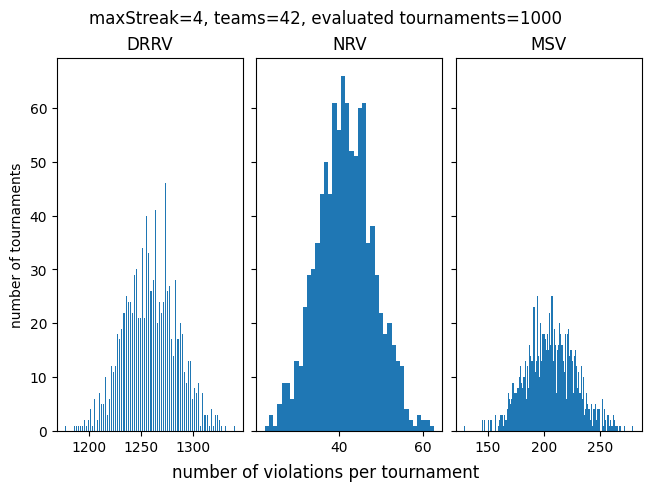

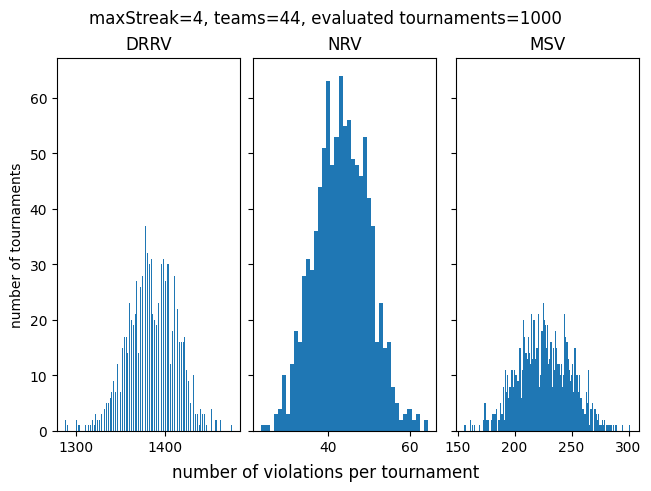

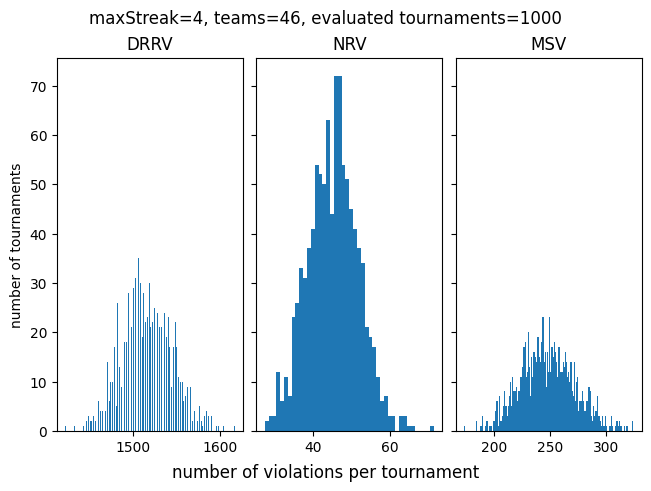

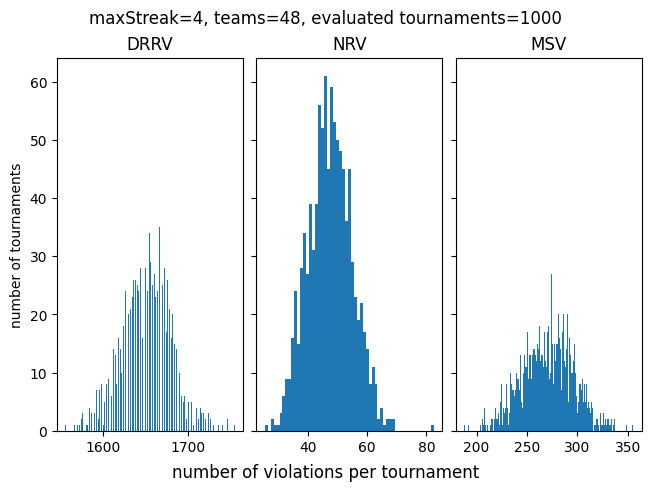

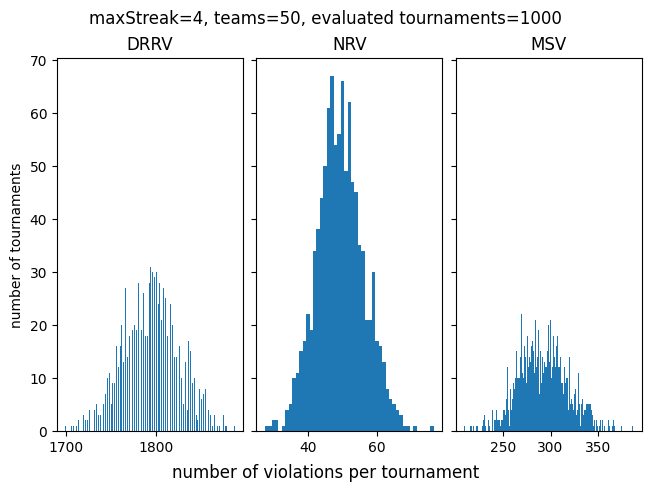

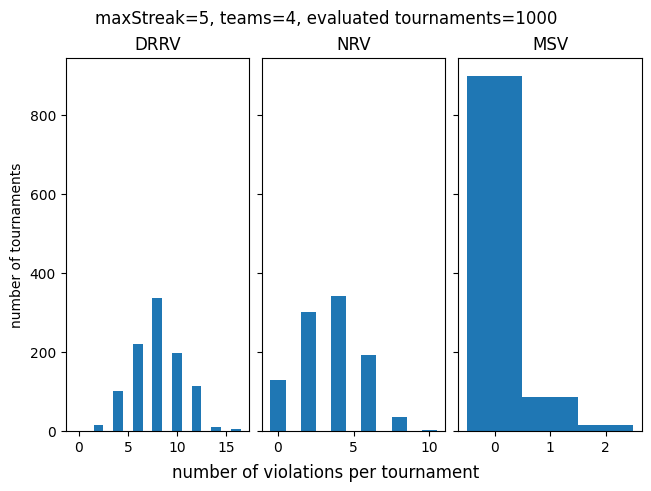

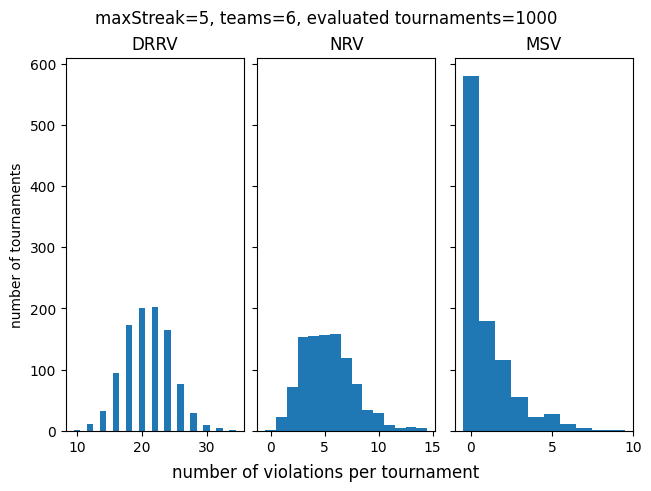

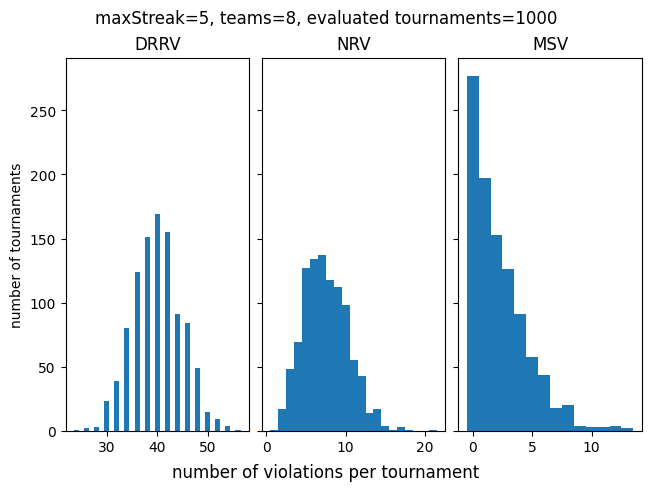

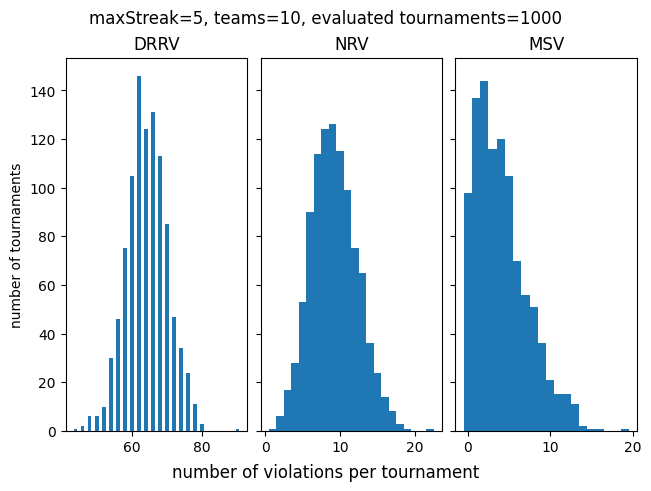

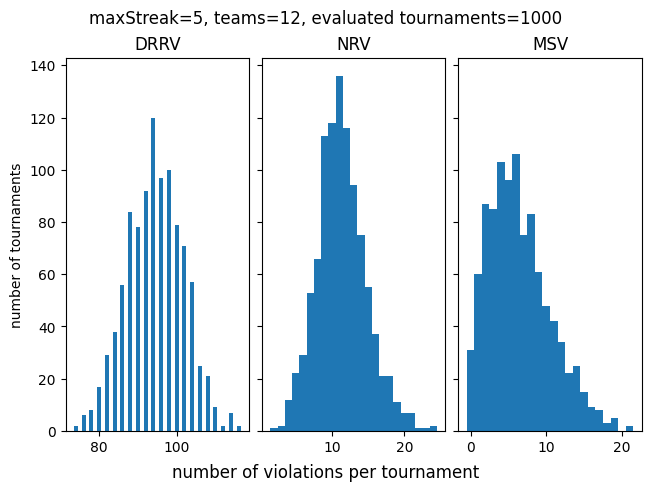

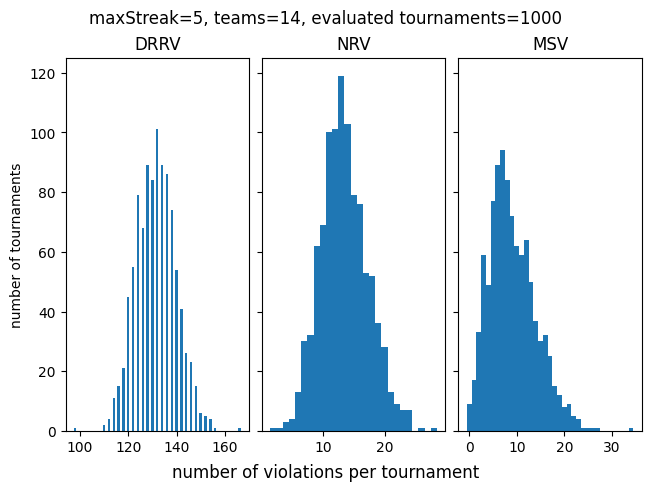

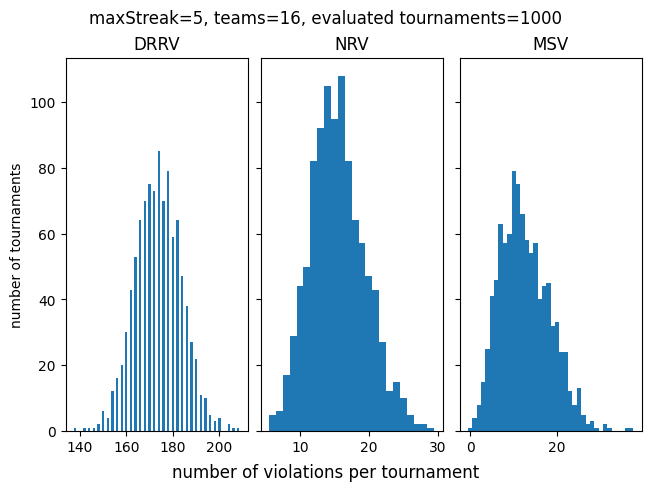

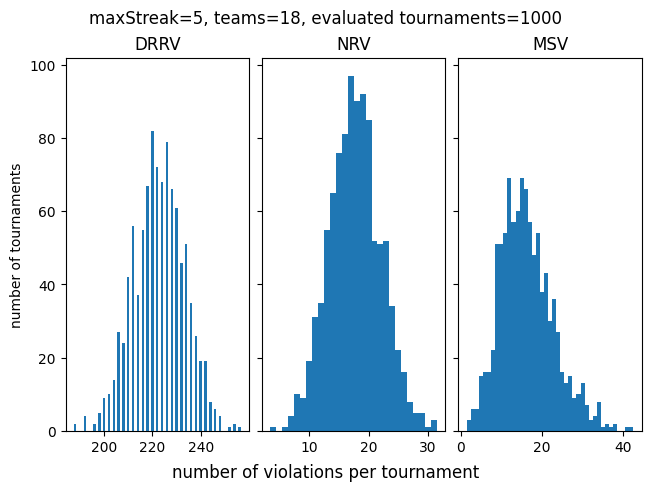

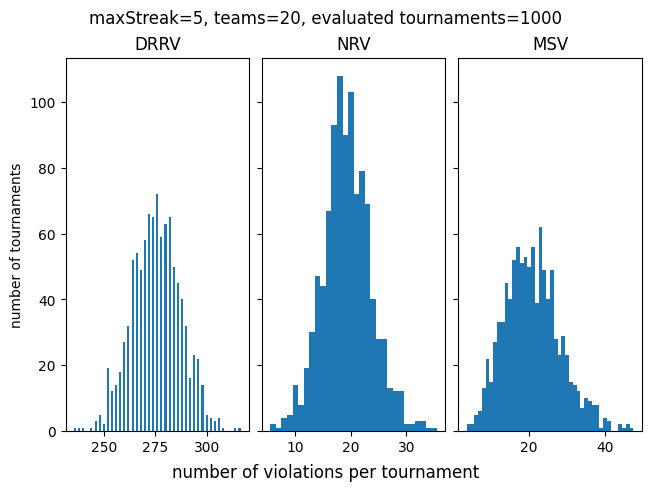

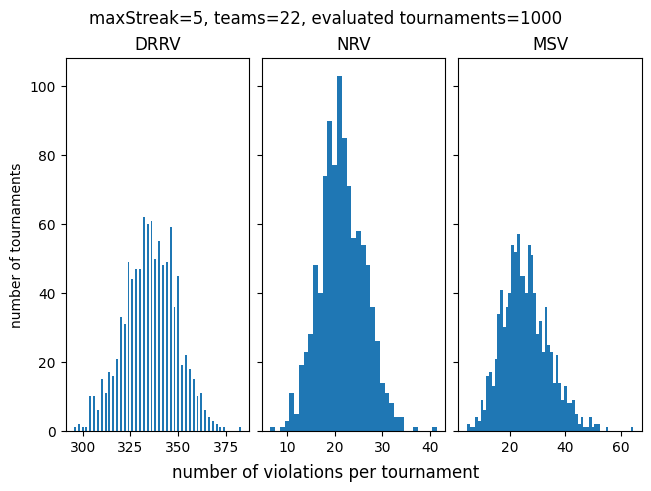

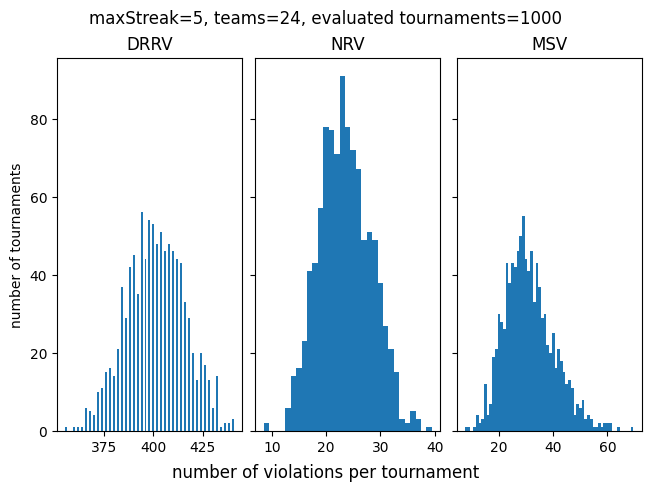

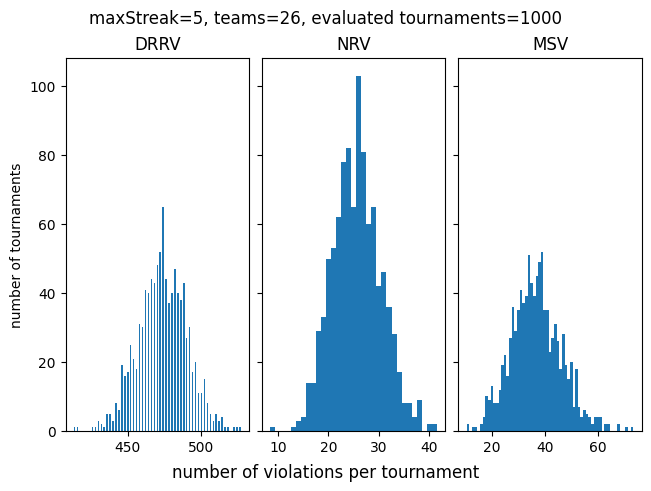

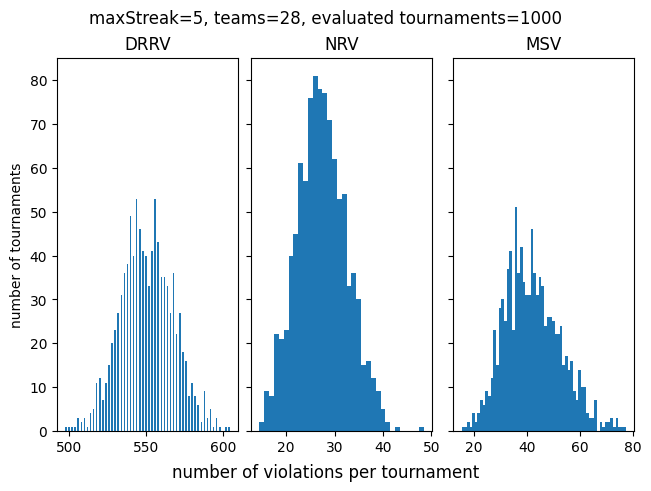

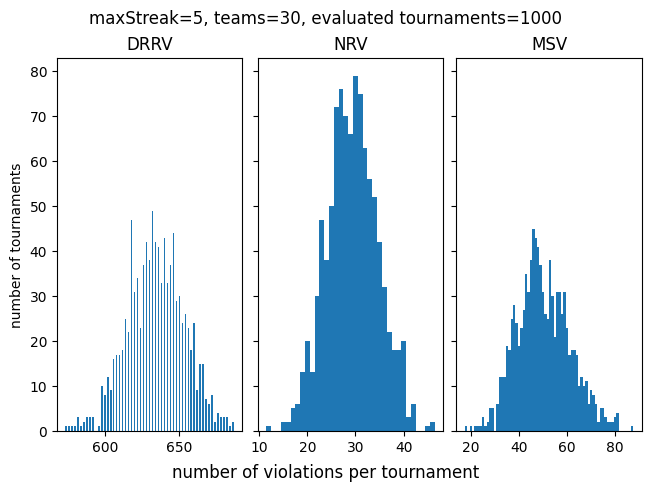

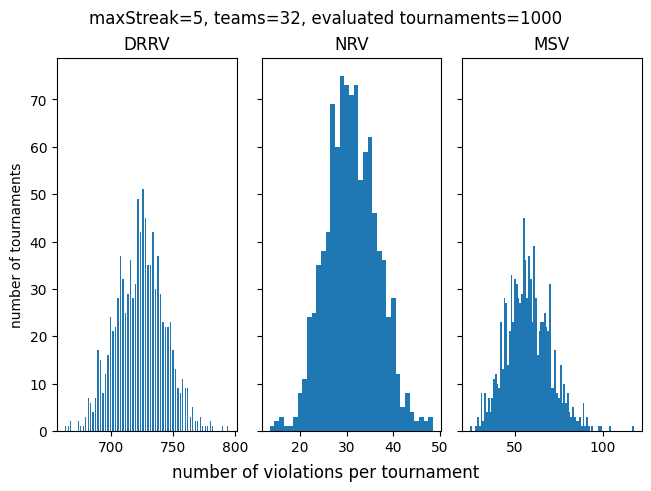

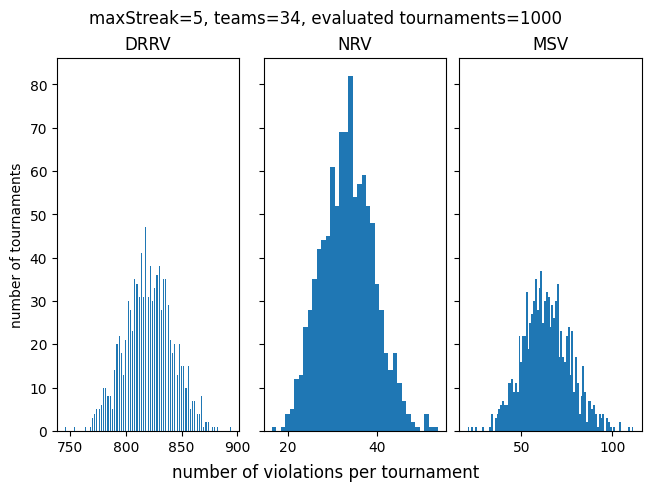

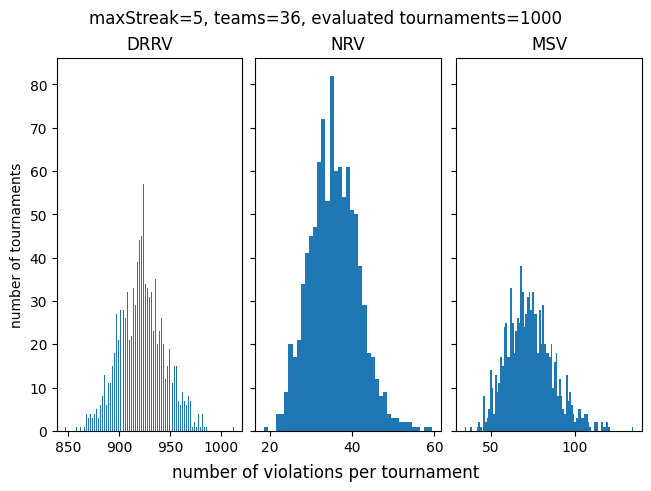

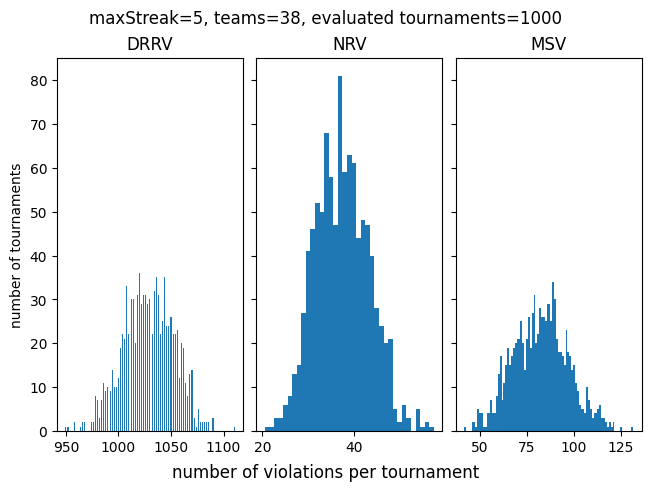

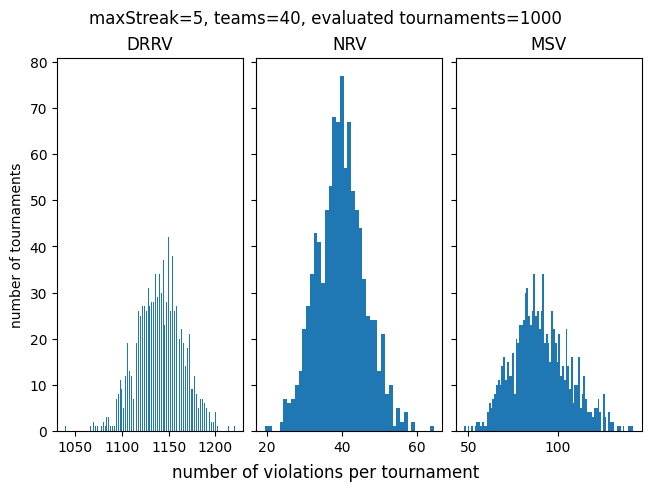

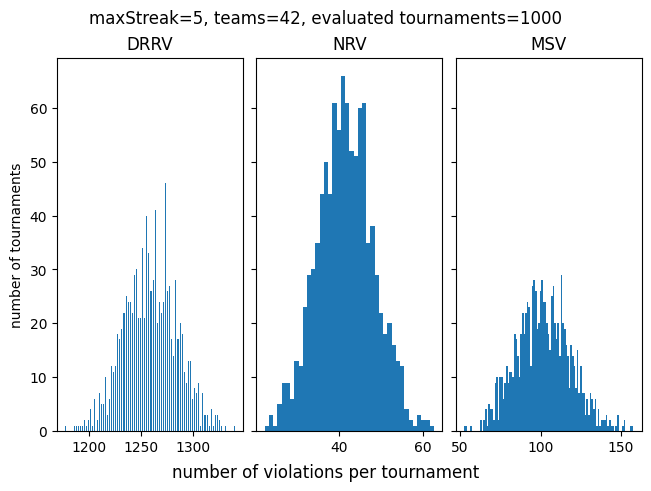

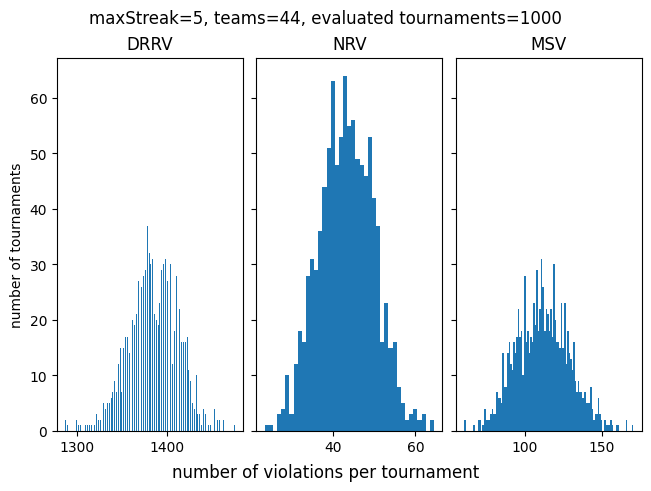

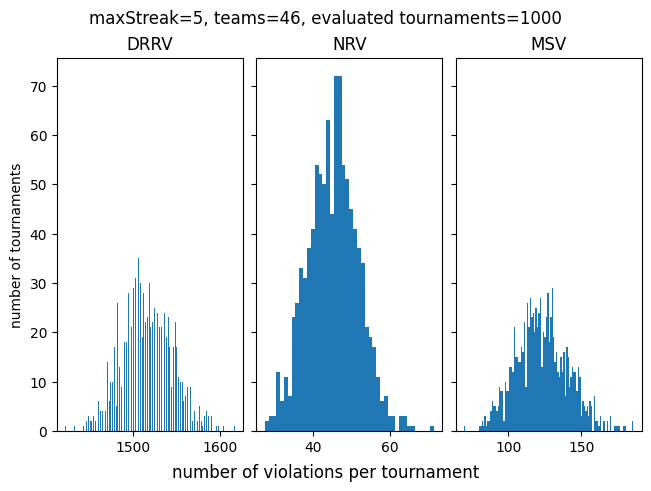

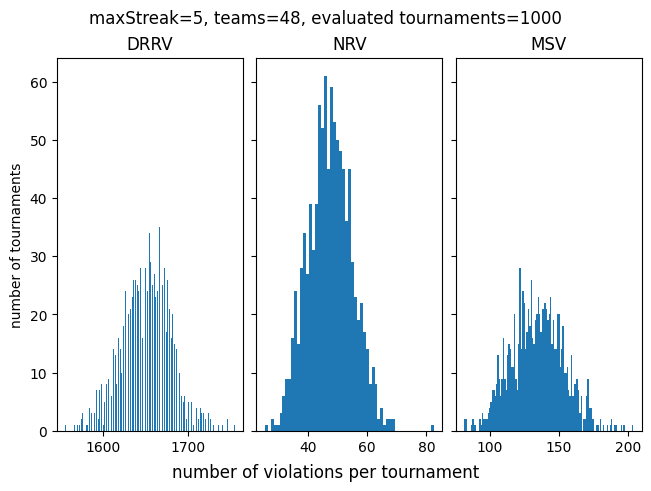

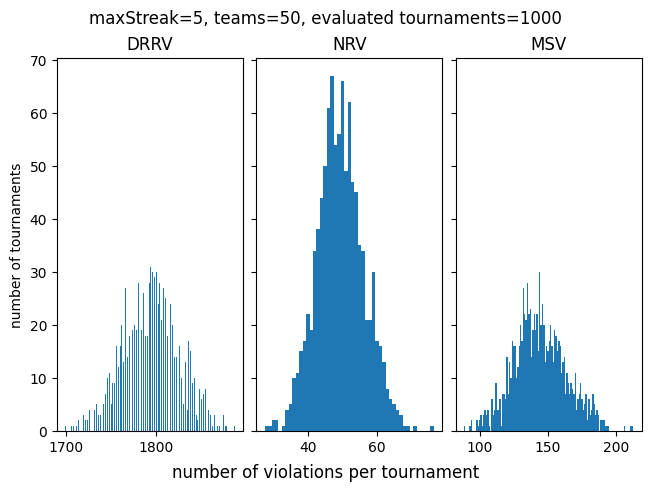

In [14]:
import matplotlib.pyplot as plt

key1 = 'maxStreak=3'
key2 = 'teams=50'
for key1 in [f"maxStreak={streakLen}" for streakLen in range(1, 6)]:
    for key2 in [f'teams={teamSize}' for teamSize in range(4, 52, 2)]:
        fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, constrained_layout=True)
        for i, key3 in enumerate(['doubleRoundRobinViolations', 'noRepeatViolations', 'maxStreakViolations']):
            histo = results[key1][key2][key3]
            # Extract values and labels from dictionary
            labels = sorted([int(c) for c in histo.keys()])
            values = [ histo[str(label)] for label in labels]
            axs[i].bar(labels, values, width=1)
            if i == 0:
                axs[i].set_ylabel('number of tournaments')
                repetitions = sum(results[key1][key2][key3].values())
            axs[i].set_title("".join(c.upper() for i,c in enumerate(key3) if c.isupper() or i == 0))
        fig.suptitle(f"{key1}, {key2}, evaluated tournaments={repetitions}")
        fig.supxlabel("number of violations per tournament")
        # plt.show()
        plt.savefig(f'figures/{key1.replace("=", "")}{key2.replace("=", "")}.png')

# 2025-01-11


In [15]:
def coefsToLatex(coefs):
    equation = ""
    l = len(coefs)
    for index, c in enumerate(coefs):
        n = (l - index) -1
        if round(c, 3) > 0:
            reprc = f"{'+' if index>0 else''}{round(c, 3):.3f}"
        else:
            reprc = f"{round(c, 3):.3f}"
        if n > 1:
            equation += f" {reprc}x^{n}"
        elif n == 1:
            equation += f" {reprc}x"
        else:
            equation += f" {reprc}"
    return equation

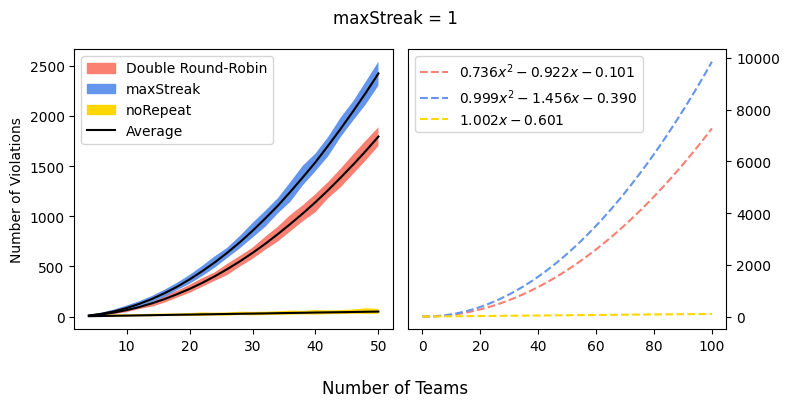

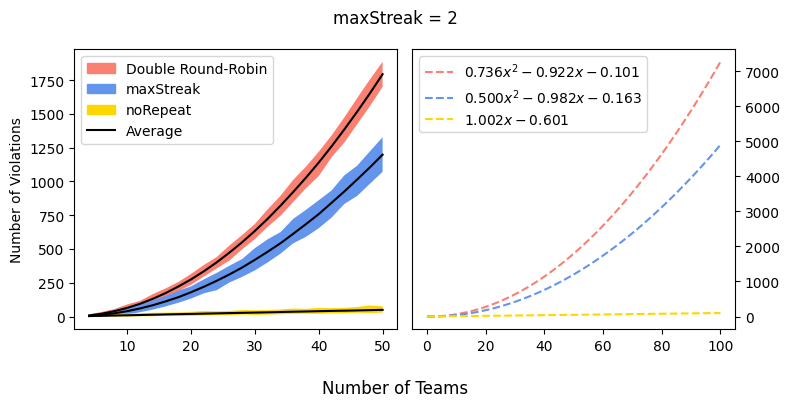

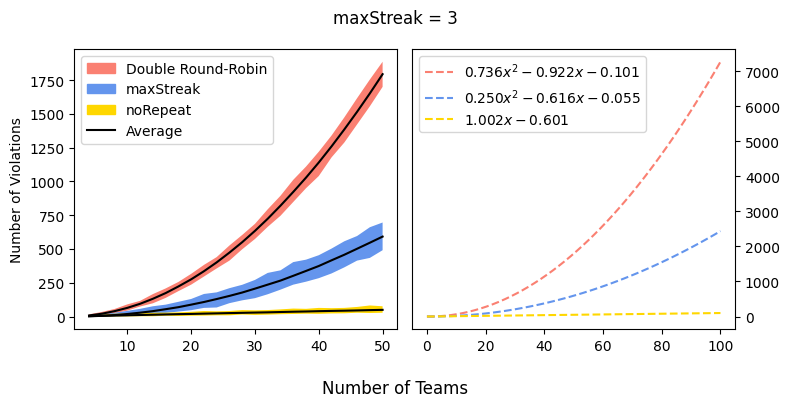

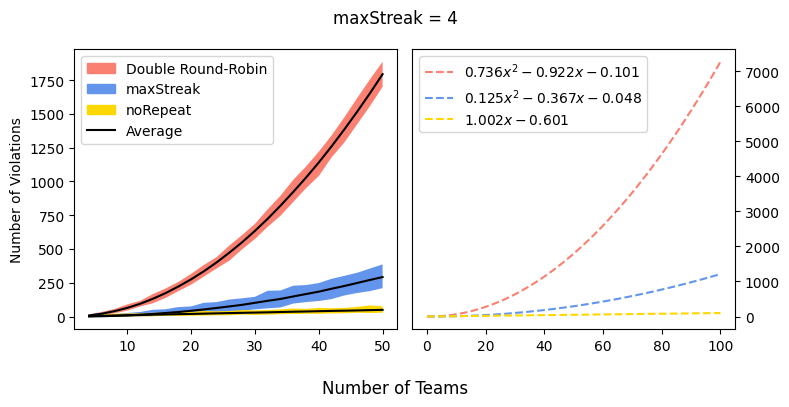

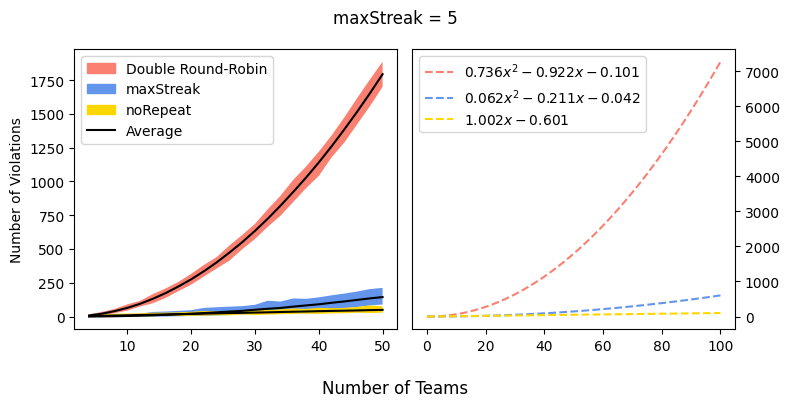

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

violations = ["maxStreakViolations", "noRepeatViolations", "doubleRoundRobinViolations"]
teamSizes = [i for i in range(4, 52, 2)]

def averageNumberViolations(data:dict[str,int]):
    keys  = [int(key) for key in data.keys()]
    return sum([key * data[str(key)] for key in keys])/sum(data.values())

def maximumNumberViolations(data:dict[str,int]):
    return max(map(int, data.keys()))

def minimumNumberViolations(data:dict[str,int]):
    return min(map(int, data.keys()))

for maxStreak in range(1, 6):
    
    alldrrv = []
    mindrrv = []
    maxdrrv = []

    allmsv = []
    minmsv = []
    maxmsv = []

    allnrv = []
    minnrv = []
    maxnrv = []

    for teamSize in teamSizes:
        currentData = results[f"maxStreak={maxStreak}"][f"teams={teamSize}"]

        alldrrv.append(averageNumberViolations(currentData["doubleRoundRobinViolations"]))
        mindrrv.append(minimumNumberViolations(currentData["doubleRoundRobinViolations"]))
        maxdrrv.append(maximumNumberViolations(currentData["doubleRoundRobinViolations"]))

        allmsv.append(averageNumberViolations(currentData["maxStreakViolations"]))
        minmsv.append(minimumNumberViolations(currentData["maxStreakViolations"]))
        maxmsv.append(maximumNumberViolations(currentData["maxStreakViolations"]))
    
        allnrv.append(averageNumberViolations(currentData["noRepeatViolations"]))
        minnrv.append(minimumNumberViolations(currentData["noRepeatViolations"]))
        maxnrv.append(maximumNumberViolations(currentData["noRepeatViolations"]))
    
    fig, axs = plt.subplots(ncols=2, figsize=(8, 4), sharey=False)

    ax = axs[0]
    
    # Plotting code
    ax.fill_between(teamSizes, mindrrv, maxdrrv, facecolor='salmon')  # 95% CI
    ax.plot(teamSizes, alldrrv, '-', label="All DRRV", color='black')  # All DRRV

    ax.fill_between(teamSizes, minmsv, maxmsv, facecolor='cornflowerblue')  # 95% CI
    ax.plot(teamSizes, allmsv, '-', label="All MSV", color='black')  # All MSV

    ax.fill_between(teamSizes, minnrv, maxnrv, facecolor='gold')  # 95% CI
    ax.plot(teamSizes, allnrv, '-', label="All NRV", color='black')  # All NRV

    # ax.set_xlabel("Number of Teams")
    fig.supxlabel("Number of Teams")
    ax.set_ylabel("Number of Violations")
    handles, labels = ax.get_legend_handles_labels()

    ax.legend([
        mpatches.Patch(color="salmon"),
        mpatches.Patch(color="cornflowerblue"),
        mpatches.Patch(color="gold"),
        mlines.Line2D([0], [0], color='black')
    ], 
    [
        "Double Round-Robin",
        "maxStreak",
        "noRepeat",
        "Average"
    ])

    drrvfit = np.polyfit(teamSizes, alldrrv, 2)
    drrvfit_fn = np.poly1d(drrvfit)
    # print("DRRV\n", drrvfit_fn)

    msvfit = np.polyfit(teamSizes, allmsv, 2)
    msvfit_fn = np.poly1d(msvfit) 
    # print("MSV\n", coefsToLatex(msvfit_fn.coef))

    nrvfit = np.polyfit(teamSizes, allnrv, 1)
    nrvfit_fn  = np.poly1d(nrvfit) 
    # print("NRV\n", coefsToLatex(nrvfit_fn.coef))

    ax = axs[1]
    xs = np.linspace(0,100)
    ys = drrvfit_fn(xs)
    ax.plot(xs, ys, "--", color='salmon',  label=rf"${coefsToLatex(drrvfit_fn.coef)}$")
    ys = msvfit_fn(xs)
    ax.plot(xs, ys, "--", color='cornflowerblue',  label=rf"${coefsToLatex(msvfit_fn.coef)}$")
    ys = nrvfit_fn(xs)
    ax.plot(xs, ys, "--", color='gold',  label=rf"${coefsToLatex(nrvfit_fn.coef)}$")
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.legend()
    fig.suptitle(f"maxStreak = {maxStreak}")
    fig.tight_layout()
    plt.savefig(f"figures/fitsForMaxStreak={maxStreak}.png")
    # plt.show()